In [3]:
from analyse_log import *


# 测试集分析

### 不同题目难度下的准确率和长度

#### AIME2024

样本总个数: 30

Level 2: 样本数 3

Level 3: 样本数 2

Level 4: 样本数 14

Level 5: 样本数 4

Level 6: 样本数 7

#### MATH500

样本总个数: 500

Level 1:  样本数 43

Level 2:  样本数 90

Level 3:  样本数 105

Level 4:  样本数 128

Level 5:  样本数 134

#### 分数

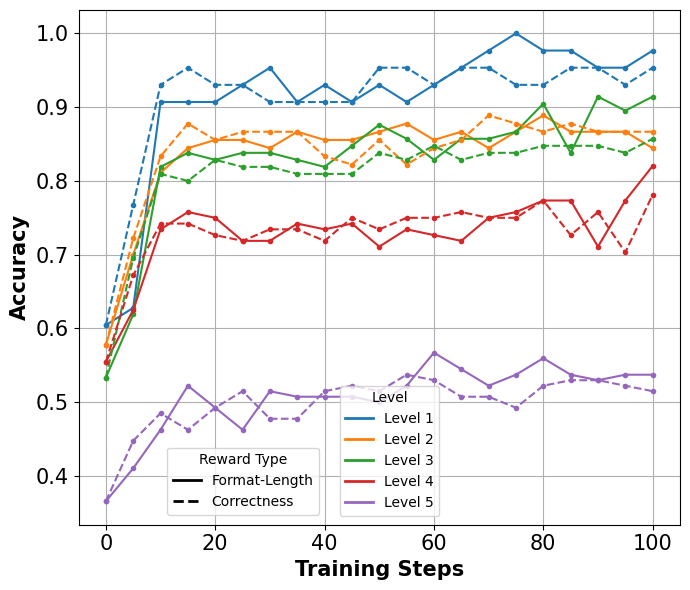

In [11]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

left_bound = 0
right_bound = 100

level_score_dict_exp1, overall_scores_exp1 = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_score_by_level_and_overall,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, level_range=[1,5])

level_score_dict_baseline, overall_scores_baseline = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_score_by_level_and_overall,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, level_range=[1,5],)

# 固定颜色映射
level_colors = {
    1: 'tab:blue',
    2: 'tab:orange',
    3: 'tab:green',
    4: 'tab:red',
    5: 'tab:purple'
}

plt.figure(figsize=(7, 6))  # 宽度拉大一点为 legend 腾空间

# 绘制 exp1（实线）
for level in sorted(level_score_dict_exp1.keys()):
    steps_sorted, avg_scores = level_score_dict_exp1[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=3,
             linestyle='-', color=level_colors[level], label=f"Level {level}")


# 绘制整体平均得分曲线
# steps_sorted, avg_overall_scores = zip(*overall_scores_exp1)
# plt.plot(steps_sorted, avg_overall_scores, label="Average",  marker='s', markersize=4, linestyle="-", color="black", linewidth=1)


# 绘制 baseline（虚线）
for level in sorted(level_score_dict_baseline.keys()):
    steps_sorted, avg_scores = level_score_dict_baseline[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=3,
             linestyle='--', color=level_colors[level])  # 不重复 label

# 构建 legend 句柄
level_handles = [Line2D([0], [0], color=color, lw=2, label=f"Level {lvl}") 
                 for lvl, color in level_colors.items()]
style_handles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Format-Length'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label="Correctness")
]



# 设置图形属性
plt.xlabel("Training Steps", fontsize=15, fontweight='bold')
plt.ylabel("Accuracy", fontsize=15, fontweight='bold')
#plt.title("MATH500 Accuracy by Level", fontsize=16)

# 主图右侧外部放置两个图例
legend1 = plt.legend(handles=level_handles, title="Level", 
                     bbox_to_anchor=(0.6, 0.27), loc='upper right', borderaxespad=0. )
legend2 = plt.legend(handles=style_handles, title="Reward Type", 
                     bbox_to_anchor=(0.4, 0.15), loc='upper right', borderaxespad=0.)



plt.gca().add_artist(legend1)

plt.tick_params(labelsize=15)

plt.grid(True)

plt.tight_layout()  # 自动调整布局

fig_path = '../data/fig/math500_level_acc.png'

plt.savefig(fig_path)


plt.show()

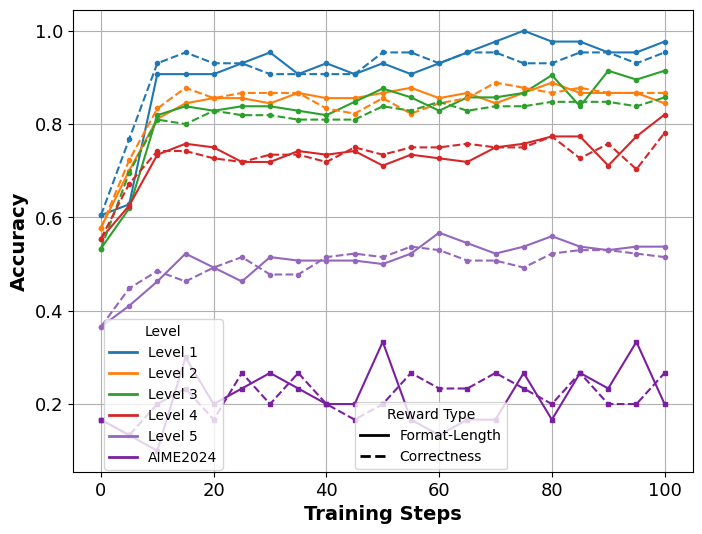

In [4]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from analyse_log import *

left_bound = 0
right_bound = 100

level_score_dict_exp1, overall_scores_exp1 = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_score_by_level_and_overall,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, level_range=[1,5])

level_score_dict_baseline, overall_scores_baseline = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_score_by_level_and_overall,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, level_range=[1,5],)


# 固定颜色映射
level_colors = {
    1: 'tab:blue',
    2: 'tab:orange',
    3: 'tab:green',
    4: 'tab:red',
    5: 'tab:purple'
}

plt.figure(figsize=(8, 6))  # 宽度拉大一点为 legend 腾空间

# 绘制 exp1（实线）
for level in sorted(level_score_dict_exp1.keys()):
    steps_sorted, avg_scores = level_score_dict_exp1[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=3,
             linestyle='-', color=level_colors[level], label=f"Level {level}")



# 绘制 baseline（虚线）
for level in sorted(level_score_dict_baseline.keys()):
    steps_sorted, avg_scores = level_score_dict_baseline[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=3,
             linestyle='--', color=level_colors[level])  # 不重复 label

# 绘制整体平均得分曲线
# steps_sorted, avg_overall_scores = zip(*overall_scores_exp1)
# plt.plot(steps_sorted, avg_overall_scores, label="Average",  marker='s', markersize=3, linestyle="-", color="black", linewidth=2)

# steps_sorted, avg_overall_scores = zip(*overall_scores_baseline)
# plt.plot(steps_sorted, avg_overall_scores,  marker='s', markersize=3, linestyle="--", color="black", linewidth=2)

_, overall_scores_exp1_aime = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_score_by_level_and_overall,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, level_range=[2,6])

_, overall_scores_baseline_aime = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_score_by_level_and_overall,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, level_range=[2,6])


# 画出 aime 
steps_sorted, avg_overall_scores = zip(*overall_scores_exp1_aime)
plt.plot(steps_sorted, avg_overall_scores, label="AIME2024",  marker='s', markersize=3, linestyle="-", color="#7B1FA2")

steps_sorted, avg_overall_scores = zip(*overall_scores_baseline_aime)
plt.plot(steps_sorted, avg_overall_scores,  marker='s', markersize=3, linestyle="--", color="#7B1FA2")



# 构建 legend 句柄
level_handles = [
    Line2D([0], [0], color=color, lw=2, label=f"Level {lvl}")  for lvl, color in level_colors.items()
]

level_handles.append(Line2D([0], [0], color="#7B1FA2", lw=2, label=f"AIME2024"))


style_handles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Format-Length'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label="Correctness")
]


# 设置图形属性
plt.xlabel("Training Steps", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy", fontsize=14, fontweight='bold')
#plt.title("MATH500 Accuracy by Level", fontsize=16)

# 主图右侧外部放置两个图例
legend1 = plt.legend(handles=level_handles, title="Level",
                     bbox_to_anchor=(0.05, 0.33), loc='upper left', borderaxespad=0.)
legend2 = plt.legend(handles=style_handles, title="Reward Type",
                     bbox_to_anchor=(0.7, 0.15), loc='upper right', borderaxespad=0.)
plt.gca().add_artist(legend1)

plt.tick_params(labelsize=13)

plt.grid(True)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # 收紧主图区域，给右侧留空间

fig_path = '../data/fig/math500_aime_level_acc.png'

plt.savefig(fig_path)


plt.show()


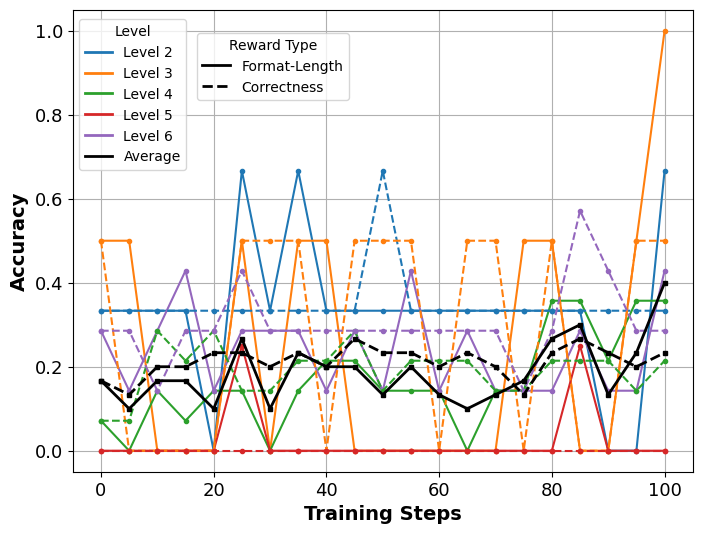

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from analyse_log import *

left_bound = 0
right_bound = 100

# level_score_dict_exp1, overall_scores_exp1 = level_func_trends(
#     '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_score_by_level_and_overall,
#     dataset_suffix="AIME2024", start=left_bound, end=right_bound, level_range=[2,6])

# level_score_dict_baseline, overall_scores_baseline = level_func_trends(
#     '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_score_by_level_and_overall,
#     dataset_suffix="AIME2024", start=left_bound, end=right_bound, level_range=[2,6])

level_score_dict_exp1, overall_scores_exp1 = level_func_trends(
    '../data/llm_outputs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_score_by_level_and_overall,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, level_range=[2,6])

level_score_dict_baseline, overall_scores_baseline = level_func_trends(
    '../data/llm_outputs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_score_by_level_and_overall,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, level_range=[2,6])

# 固定颜色映射
level_colors = {
    2: 'tab:blue',
    3: 'tab:orange',
    4: 'tab:green',
    5: 'tab:red',
    6: 'tab:purple'
}

plt.figure(figsize=(8, 6))  # 宽度拉大一点为 legend 腾空间

# 绘制 exp1（实线）
for level in sorted(level_score_dict_exp1.keys()):
    steps_sorted, avg_scores = level_score_dict_exp1[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=3,
             linestyle='-', color=level_colors[level], label=f"Level {level}")



# 绘制 baseline（虚线）
for level in sorted(level_score_dict_baseline.keys()):
    steps_sorted, avg_scores = level_score_dict_baseline[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=3,
             linestyle='--', color=level_colors[level])  # 不重复 label

# 绘制整体平均得分曲线
steps_sorted, avg_overall_scores = zip(*overall_scores_exp1)
plt.plot(steps_sorted, avg_overall_scores, label="Average",  marker='s', markersize=3, linestyle="-", color="black", linewidth=2)

steps_sorted, avg_overall_scores = zip(*overall_scores_baseline)
plt.plot(steps_sorted, avg_overall_scores,  marker='s', markersize=3, linestyle="--", color="black", linewidth=2)




# 构建 legend 句柄
level_handles = [
    Line2D([0], [0], color=color, lw=2, label=f"Level {lvl}")  for lvl, color in level_colors.items()
]

level_handles.append(Line2D([0], [0], color="black", lw=2, label=f"Average"))


style_handles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Format-Length'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label="Correctness")
]



# 设置图形属性
plt.xlabel("Training Steps", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy", fontsize=14, fontweight='bold')
#plt.title("MATH500 Accuracy by Level", fontsize=16)


# 第一个图例：Level 放在左上角偏下一点
legend1 = plt.legend(handles=level_handles, title="Level",
                     bbox_to_anchor=(0.01, 0.98), loc='upper left', borderaxespad=0.)

# 添加到图中
# plt.gca().add_artist(legend1)

# 第二个图例：Reward Type 放在第一个图例正下方
legend2 = plt.legend(handles=style_handles, title="Reward Type",
                     bbox_to_anchor=(0.20, 0.95), loc='upper left', borderaxespad=0.)


plt.gca().add_artist(legend1)

plt.tick_params(labelsize=13)

plt.grid(True)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # 收紧主图区域，给右侧留空间

fig_path = '../data/fig/aime2024_level_acc_2.png'

plt.savefig(fig_path)


plt.show()


In [21]:
level_score_dict_exp1[5][1][-2] # 0.582089552238806
level_score_dict_baseline[5][1][-2] # 0.5074626865671642

(0.582089552238806 - 0.5074626865671642)/0.5074626865671642 # 0.14705882352941174


0.14705882352941174

In [205]:
level_score_dict_exp1[1][1][0] #0.6046511627906976

level_score_dict_exp1[1][1][-2] # 1.0

(level_score_dict_exp1[1][1][-2]-level_score_dict_exp1[1][1][0])/level_score_dict_exp1[1][1][0]

0.653846153846154

In [4]:
# level_score_dict_exp1[5][1][0] # 0.3656716417910448
# level_score_dict_exp1[5][1][-2] # 0.582089552238806

# print(level_score_dict_exp1[4][1][0]) # 0.5546875
# print(level_score_dict_exp1[4][1][-2]) # 0.8046875

(level_score_dict_exp1[5][1][-2]-level_score_dict_exp1[5][1][0])/level_score_dict_exp1[5][1][0] # 0.5918367346938775

print("format+length:")
for i in range(1,6):

    max_score = max(level_score_dict_exp1[i][1])

    base_score = level_score_dict_exp1[i][1][0]
    
    upgrade_ratio = (max_score-level_score_dict_exp1[i][1][0])/level_score_dict_exp1[i][1][0]
    
    print("level:{}, init_score:{}, max_score:{}, growth rate:{}".format(i, base_score, max_score, upgrade_ratio))

print("baseline:")
for i in range(1,6):

    max_score = max(level_score_dict_baseline[i][1])

    base_score = level_score_dict_exp1[i][1][0]
    
    upgrade_ratio = (max_score-level_score_dict_baseline[i][1][0])/level_score_dict_baseline[i][1][0]
    
    print("level:{}, init_score:{}, max_score:{}, growth rate:{}".format(i, base_score, max_score, upgrade_ratio))



format+length:
level:1, init_score:0.6046511627906976, max_score:1.0, growth rate:0.653846153846154
level:2, init_score:0.5777777777777777, max_score:0.8888888888888888, growth rate:0.5384615384615385
level:3, init_score:0.5333333333333333, max_score:0.9142857142857143, growth rate:0.7142857142857143
level:4, init_score:0.5546875, max_score:0.8203125, growth rate:0.4788732394366197
level:5, init_score:0.3656716417910448, max_score:0.5671641791044776, growth rate:0.5510204081632653
baseline:
level:1, init_score:0.6046511627906976, max_score:0.9534883720930233, growth rate:0.5769230769230771
level:2, init_score:0.5777777777777777, max_score:0.8888888888888888, growth rate:0.5384615384615385
level:3, init_score:0.5333333333333333, max_score:0.8571428571428571, growth rate:0.6071428571428571
level:4, init_score:0.5546875, max_score:0.78125, growth rate:0.4084507042253521
level:5, init_score:0.3656716417910448, max_score:0.5373134328358209, growth rate:0.4693877551020408


#### 长度

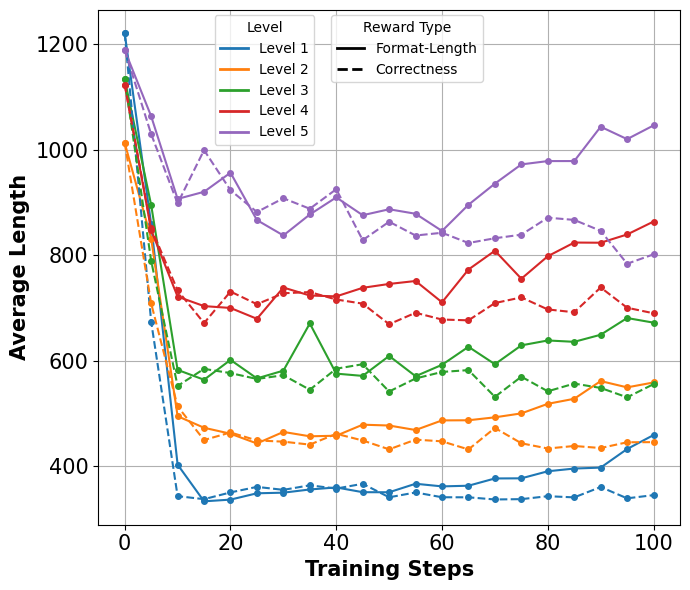

In [186]:
import matplotlib.pyplot as plt
from analyse_log import *
from matplotlib.lines import Line2D

left_bound = 0
right_bound = 100

level_score_dict_exp1, overall_scores_exp1 = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_solution_length_by_level,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, level_range=[1,5])

level_score_dict_baseline, overall_scores_baseline = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_solution_length_by_level,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, level_range=[1,5],)

# 固定颜色映射
level_colors = {
    1: 'tab:blue',
    2: 'tab:orange',
    3: 'tab:green',
    4: 'tab:red',
    5: 'tab:purple'
}

plt.figure(figsize=(7, 6))  # 宽度拉大一点为 legend 腾空间

# 绘制 exp1（实线）
for level in sorted(level_score_dict_exp1.keys()):
    steps_sorted, avg_scores = level_score_dict_exp1[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=4,
             linestyle='-', color=level_colors[level], label=f"Level {level}")


# 绘制整体平均得分曲线
# steps_sorted, avg_overall_scores = zip(*overall_scores_exp1)
# plt.plot(steps_sorted, avg_overall_scores, label="Average",  marker='s', markersize=4, linestyle="-", color="black", linewidth=1)


# 绘制 baseline（虚线）
for level in sorted(level_score_dict_baseline.keys()):
    steps_sorted, avg_scores = level_score_dict_baseline[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=4,
             linestyle='--', color=level_colors[level])  # 不重复 label

# 构建 legend 句柄
level_handles = [Line2D([0], [0], color=color, lw=2, label=f"Level {lvl}") 
                 for lvl, color in level_colors.items()]
style_handles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Format-Length'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label="Correctness")
]



# 设置图形属性
plt.xlabel("Training Steps", fontsize=15, fontweight='bold')
plt.ylabel("Average Length", fontsize=15, fontweight='bold')
#plt.title("MATH500 Response Length by Level", fontsize=16)

# 主图右侧外部放置两个图例
legend1 = plt.legend(handles=level_handles, title="Level",
                     bbox_to_anchor=(0.2, 0.99), loc='upper left', borderaxespad=0.)
legend2 = plt.legend(handles=style_handles, title="Reward Type",
                     bbox_to_anchor=(0.4, 0.99), loc='upper left', borderaxespad=0.)
plt.gca().add_artist(legend1)


plt.tick_params(labelsize=15)

plt.grid(True)

plt.tight_layout()  # 自动调整布局

fig_path = '../data/fig/math500_level_length.png'

plt.savefig(fig_path)

# plt.tight_layout(rect=[0, 0, 0.8, 1])  # 收紧主图区域，给右侧留空间
plt.show()


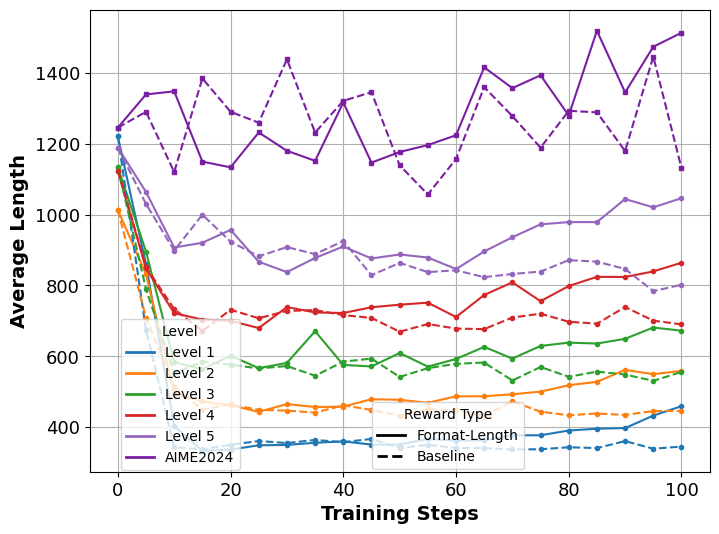

In [52]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from analyse_log import *

left_bound = 0
right_bound = 100

level_score_dict_exp1, overall_scores_exp1 = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_solution_length_by_level,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, level_range=[1,5])

level_score_dict_baseline, overall_scores_baseline = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_solution_length_by_level,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, level_range=[1,5],)


# 固定颜色映射
level_colors = {
    1: 'tab:blue',
    2: 'tab:orange',
    3: 'tab:green',
    4: 'tab:red',
    5: 'tab:purple'
}

plt.figure(figsize=(8, 6))  # 宽度拉大一点为 legend 腾空间

# 绘制 exp1（实线）
for level in sorted(level_score_dict_exp1.keys()):
    steps_sorted, avg_scores = level_score_dict_exp1[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=3,
             linestyle='-', color=level_colors[level], label=f"Level {level}")



# 绘制 baseline（虚线）
for level in sorted(level_score_dict_baseline.keys()):
    steps_sorted, avg_scores = level_score_dict_baseline[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=3,
             linestyle='--', color=level_colors[level])  # 不重复 label


_, overall_scores_exp1_aime = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_solution_length_by_level,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, level_range=[2,6])

_, overall_scores_baseline_aime = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_solution_length_by_level,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, level_range=[2,6])


# 画出 aime 
steps_sorted, avg_overall_scores = zip(*overall_scores_exp1_aime)
plt.plot(steps_sorted, avg_overall_scores, label="AIME2024",  marker='s', markersize=3, linestyle="-", color="#7B1FA2")

steps_sorted, avg_overall_scores = zip(*overall_scores_baseline_aime)
plt.plot(steps_sorted, avg_overall_scores,  marker='s', markersize=3, linestyle="--", color="#7B1FA2")



# 构建 legend 句柄
level_handles = [
    Line2D([0], [0], color=color, lw=2, label=f"Level {lvl}")  for lvl, color in level_colors.items()
]

level_handles.append(Line2D([0], [0], color="#7B1FA2", lw=2, label=f"AIME2024"))


style_handles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Format-Length'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label="Correctness")
]



# 设置图形属性
plt.xlabel("Training Steps", fontsize=14, fontweight='bold')
plt.ylabel("Average Length", fontsize=14, fontweight='bold')
#plt.title("MATH500 Accuracy by Level", fontsize=16)

# 主图右侧外部放置两个图例
legend1 = plt.legend(handles=level_handles, title="Level",
                     bbox_to_anchor=(0.05, 0.33), loc='upper left', borderaxespad=0.)
legend2 = plt.legend(handles=style_handles, title="Reward Type",
                     bbox_to_anchor=(0.7, 0.15), loc='upper right', borderaxespad=0.)
plt.gca().add_artist(legend1)

plt.tick_params(labelsize=13)

plt.grid(True)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # 收紧主图区域，给右侧留空间

fig_path = '../data/fig/math500_aime_level_length.png'

plt.savefig(fig_path)


plt.show()


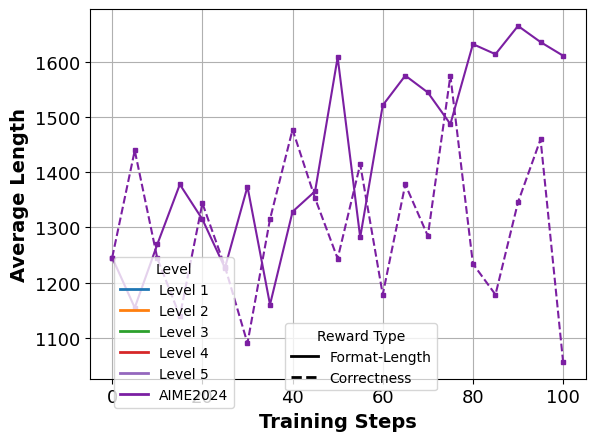

In [10]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from analyse_log import *

left_bound = 0
right_bound = 100


_, overall_scores_exp1_aime = level_func_trends(
    '../data/llm_outputs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_solution_length_by_level,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, level_range=[2,6])

_, overall_scores_baseline_aime = level_func_trends(
    '../data/llm_outputs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_solution_length_by_level,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, level_range=[2,6])


# 画出 aime 
steps_sorted, avg_overall_scores = zip(*overall_scores_exp1_aime)
plt.plot(steps_sorted, avg_overall_scores, label="AIME2024",  marker='s', markersize=3, linestyle="-", color="#7B1FA2")

steps_sorted, avg_overall_scores = zip(*overall_scores_baseline_aime)
plt.plot(steps_sorted, avg_overall_scores,  marker='s', markersize=3, linestyle="--", color="#7B1FA2")



# 构建 legend 句柄
level_handles = [
    Line2D([0], [0], color=color, lw=2, label=f"Level {lvl}")  for lvl, color in level_colors.items()
]

level_handles.append(Line2D([0], [0], color="#7B1FA2", lw=2, label=f"AIME2024"))


style_handles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Format-Length'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label="Correctness")
]



# 设置图形属性
plt.xlabel("Training Steps", fontsize=14, fontweight='bold')
plt.ylabel("Average Length", fontsize=14, fontweight='bold')
#plt.title("MATH500 Accuracy by Level", fontsize=16)

# 主图右侧外部放置两个图例
legend1 = plt.legend(handles=level_handles, title="Level",
                     bbox_to_anchor=(0.05, 0.33), loc='upper left', borderaxespad=0.)
legend2 = plt.legend(handles=style_handles, title="Reward Type",
                     bbox_to_anchor=(0.7, 0.15), loc='upper right', borderaxespad=0.)
plt.gca().add_artist(legend1)

plt.tick_params(labelsize=13)

plt.grid(True)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # 收紧主图区域，给右侧留空间

fig_path = '../data/fig/aime_level_length_2.png'

plt.savefig(fig_path)


plt.show()


### 反思词统计

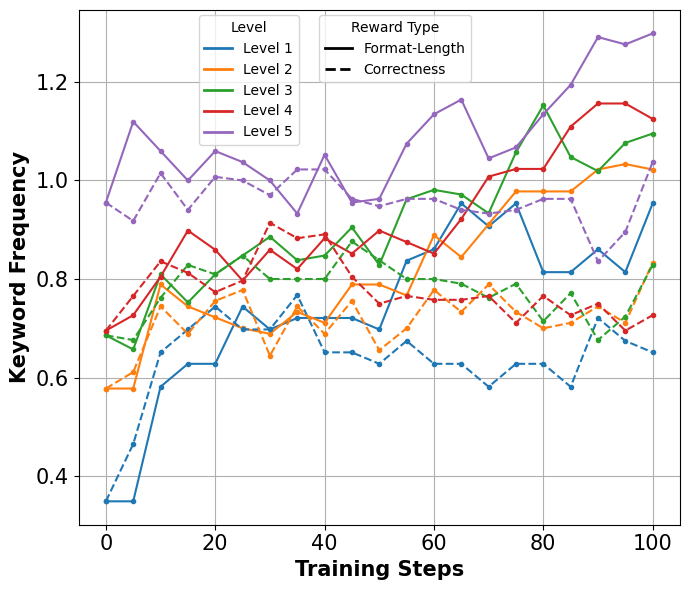

In [188]:
import matplotlib.pyplot as plt
from analyse_log import *
from matplotlib.lines import Line2D

left_bound = 0
right_bound = 100

level_score_dict_exp1, overall_scores_exp1 = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_rethink_word_by_level_and_overall,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, stats_mode='avg_rethink_num', level_range=[1,5])

level_score_dict_baseline, overall_scores_baseline = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_rethink_word_by_level_and_overall,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, stats_mode='avg_rethink_num', level_range=[1,5])

# 固定颜色映射
level_colors = {
    1: 'tab:blue',
    2: 'tab:orange',
    3: 'tab:green',
    4: 'tab:red',
    5: 'tab:purple'
}

plt.figure(figsize=(7, 6))  # 宽度拉大一点为 legend 腾空间

# 绘制 exp1（实线）
for level in sorted(level_score_dict_exp1.keys()):
    steps_sorted, avg_scores = level_score_dict_exp1[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=3,
             linestyle='-', color=level_colors[level], label=f"Level {level}")


# 绘制整体平均得分曲线
# steps_sorted, avg_overall_scores = zip(*overall_scores_exp1)
# plt.plot(steps_sorted, avg_overall_scores, label="Average",  marker='s', markersize=3, linestyle="-", color="black", linewidth=2)

# steps_sorted, avg_overall_scores = zip(*overall_scores_baseline)
# plt.plot(steps_sorted, avg_overall_scores,  marker='s', markersize=3, linestyle="--", color="black", linewidth=2)


# 绘制 baseline（虚线）
for level in sorted(level_score_dict_baseline.keys()):
    steps_sorted, avg_scores = level_score_dict_baseline[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=3,
             linestyle='--', color=level_colors[level])  # 不重复 label

# 构建 legend 句柄
level_handles = [Line2D([0], [0], color=color, lw=2, label=f"Level {lvl}") 
                 for lvl, color in level_colors.items()]

# level_handles.append(Line2D([0], [0], color="black", lw=2, label=f"Average"))

style_handles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Format-Length'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label="Correctness")
]




# 设置图形属性
plt.xlabel("Training Steps", fontsize=15, fontweight='bold')
plt.ylabel("Keyword Frequency", fontsize=15, fontweight='bold')
#plt.title("MATH500 Keyword Frequency by Level", fontsize=16)

# 主图右侧外部放置两个图例
legend1 = plt.legend(handles=level_handles, title="Level",
                     bbox_to_anchor=(0.2, 0.99), loc='upper left', borderaxespad=0.)
legend2 = plt.legend(handles=style_handles, title="Reward Type",
                     bbox_to_anchor=(0.4, 0.99), loc='upper left', borderaxespad=0.)
plt.gca().add_artist(legend1)

plt.tick_params(labelsize=15)

plt.grid(True)

plt.tight_layout()  # 自动调整布局

fig_path = '../data/fig/math500_rethink_num.png'

plt.savefig(fig_path)

plt.show()


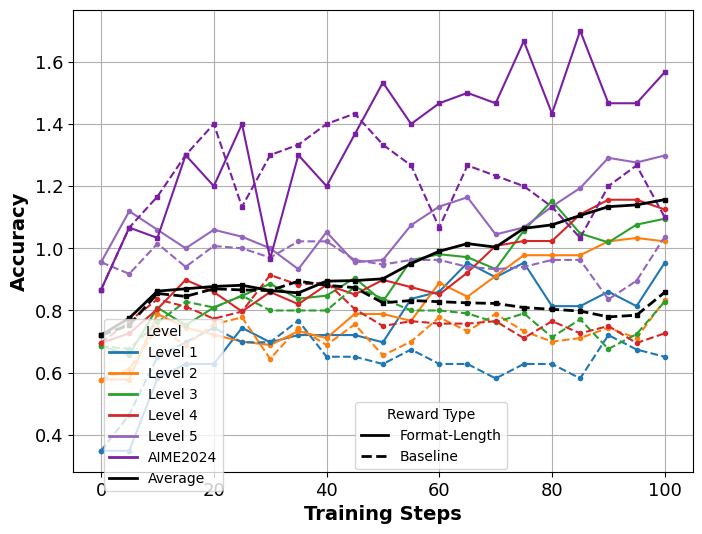

In [2]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from analyse_log import *

left_bound = 0
right_bound = 100

level_score_dict_exp1, overall_scores_exp1 = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_rethink_word_by_level_and_overall,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, level_range=[1,5],  stats_mode='avg_rethink_num')

level_score_dict_baseline, overall_scores_baseline = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_rethink_word_by_level_and_overall,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, level_range=[1,5],  stats_mode='avg_rethink_num')


# 固定颜色映射
level_colors = {
    1: 'tab:blue',
    2: 'tab:orange',
    3: 'tab:green',
    4: 'tab:red',
    5: 'tab:purple'
}

plt.figure(figsize=(8, 6))  # 宽度拉大一点为 legend 腾空间

# 绘制 exp1（实线）
for level in sorted(level_score_dict_exp1.keys()):
    steps_sorted, avg_scores = level_score_dict_exp1[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=3,
             linestyle='-', color=level_colors[level], label=f"Level {level}")



# 绘制 baseline（虚线）
for level in sorted(level_score_dict_baseline.keys()):
    steps_sorted, avg_scores = level_score_dict_baseline[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=3,
             linestyle='--', color=level_colors[level])  # 不重复 label


_, overall_scores_exp1_aime = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_rethink_word_by_level_and_overall,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, level_range=[2,6],  stats_mode='avg_rethink_num')

_, overall_scores_baseline_aime = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_rethink_word_by_level_and_overall,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, level_range=[2,6],  stats_mode='avg_rethink_num')


# 画出 aime 
steps_sorted, avg_overall_scores = zip(*overall_scores_exp1_aime)
plt.plot(steps_sorted, avg_overall_scores, label="AIME2024",  marker='s', markersize=3, linestyle="-", color="#7B1FA2")

steps_sorted, avg_overall_scores = zip(*overall_scores_baseline_aime)
plt.plot(steps_sorted, avg_overall_scores,  marker='s', markersize=3, linestyle="--", color="#7B1FA2")


# 计算整体的平均
avg_overall_scores_exp1 = weighted_average_with_step(overall_scores_exp1, overall_scores_exp1_aime, weights=[500, 30])
avg_overall_scores_baseline = weighted_average_with_step(overall_scores_baseline, overall_scores_baseline_aime, weights=[500, 30])

steps_sorted, avg_overall_scores = zip(*avg_overall_scores_exp1)
plt.plot(steps_sorted, avg_overall_scores, label="Average",  marker='s', markersize=3, linestyle="-", color="black", linewidth=2)

steps_sorted, avg_overall_scores = zip(*avg_overall_scores_baseline)
plt.plot(steps_sorted, avg_overall_scores,  marker='s', markersize=3, linestyle="--", color="black", linewidth=2)



# 构建 legend 句柄
level_handles = [
    Line2D([0], [0], color=color, lw=2, label=f"Level {lvl}")  for lvl, color in level_colors.items()
]

level_handles.append(Line2D([0], [0], color="#7B1FA2", lw=2, label=f"AIME2024"))
level_handles.append(Line2D([0], [0], color="black", lw=2, label=f"Average"))


style_handles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Format-Length'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label="Correctness")
]



# 设置图形属性
plt.xlabel("Training Steps", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy", fontsize=14, fontweight='bold')
#plt.title("MATH500 Accuracy by Level", fontsize=16)

# 主图右侧外部放置两个图例
legend1 = plt.legend(handles=level_handles, title="Level",
                     bbox_to_anchor=(0.05, 0.33), loc='upper left', borderaxespad=0.)
legend2 = plt.legend(handles=style_handles, title="Reward Type",
                     bbox_to_anchor=(0.7, 0.15), loc='upper right', borderaxespad=0.)
plt.gca().add_artist(legend1)

plt.tick_params(labelsize=13)

plt.grid(True)
# plt.tight_layout(rect=[0, 0, 0.8, 1])  # 收紧主图区域，给右侧留空间

fig_path = '../data/fig/math500_aime_rethink_num.png'

plt.savefig(fig_path)


plt.show()


### N-gram 重复统计

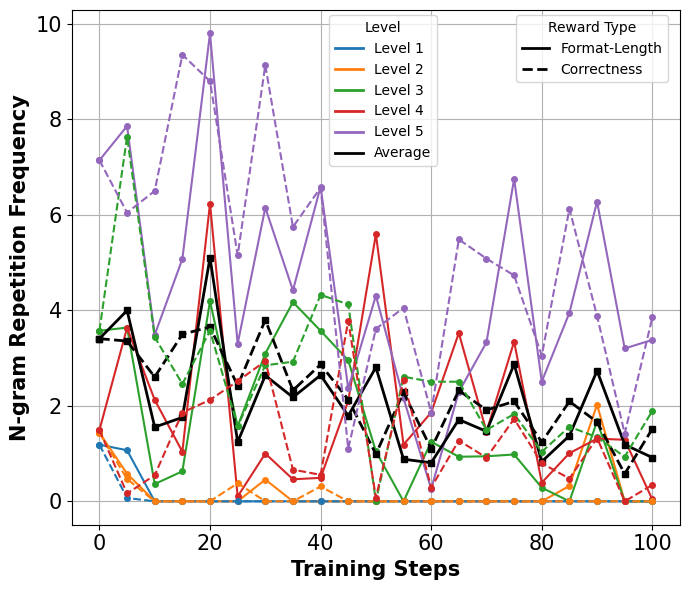

In [189]:
import matplotlib.pyplot as plt
from analyse_log import *
from matplotlib.lines import Line2D

left_bound = 0
right_bound = 100

level_score_dict_exp1, overall_scores_exp1 = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_repetition_by_level_and_overall,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, stats_mode='avg_n_gram_rep_num', level_range=[1, 5])

level_score_dict_baseline, overall_scores_baseline = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_repetition_by_level_and_overall,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, stats_mode='avg_n_gram_rep_num', level_range=[1, 5])

# 固定颜色映射
level_colors = {
    1: 'tab:blue',
    2: 'tab:orange',
    3: 'tab:green',
    4: 'tab:red',
    5: 'tab:purple'
}

plt.figure(figsize=(7, 6))  # 宽度拉大一点为 legend 腾空间

# 绘制 exp1（实线）
for level in sorted(level_score_dict_exp1.keys()):
    steps_sorted, avg_scores = level_score_dict_exp1[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=4,
             linestyle='-', color=level_colors[level], label=f"Level {level}")


# 绘制整体平均得分曲线
steps_sorted, avg_overall_scores = zip(*overall_scores_exp1)
plt.plot(steps_sorted, avg_overall_scores, label="Average",  marker='s', markersize=4, linestyle="-", color="black", linewidth=2)

steps_sorted, avg_overall_scores = zip(*overall_scores_baseline)
plt.plot(steps_sorted, avg_overall_scores,  marker='s', markersize=4, linestyle="--", color="black", linewidth=2)


# 绘制 baseline（虚线）
for level in sorted(level_score_dict_baseline.keys()):
    steps_sorted, avg_scores = level_score_dict_baseline[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=4,
             linestyle='--', color=level_colors[level])  # 不重复 label

# 构建 legend 句柄
level_handles = [Line2D([0], [0], color=color, lw=2, label=f"Level {lvl}") 
                 for lvl, color in level_colors.items()]

level_handles.append(Line2D([0], [0], color="black", lw=2, label=f"Average"))

style_handles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Format-Length'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label="Correctness")
]





# 设置图形属性
plt.xlabel("Training Steps", fontsize=15, fontweight='bold')
plt.ylabel("N-gram Repetition Frequency", fontsize=15, fontweight='bold')
#plt.title("MATH500 N-gram Repetition Frequency by Level", fontsize=16)

# 主图右侧外部放置两个图例
legend1 = plt.legend(handles=level_handles, title="Level",
                     bbox_to_anchor=(0.6,  0.99), loc='upper right', borderaxespad=0.)
legend2 = plt.legend(handles=style_handles, title="Reward Type",
                     bbox_to_anchor=(0.98, 0.99), loc='upper right', borderaxespad=0.)
plt.gca().add_artist(legend1)

plt.tick_params(labelsize=15)

plt.grid(True)

plt.tight_layout()  # 自动调整布局

fig_path = '../data/fig/math500_n_gram_rep.png'

plt.savefig(fig_path)

plt.show()



### 最长重复子串

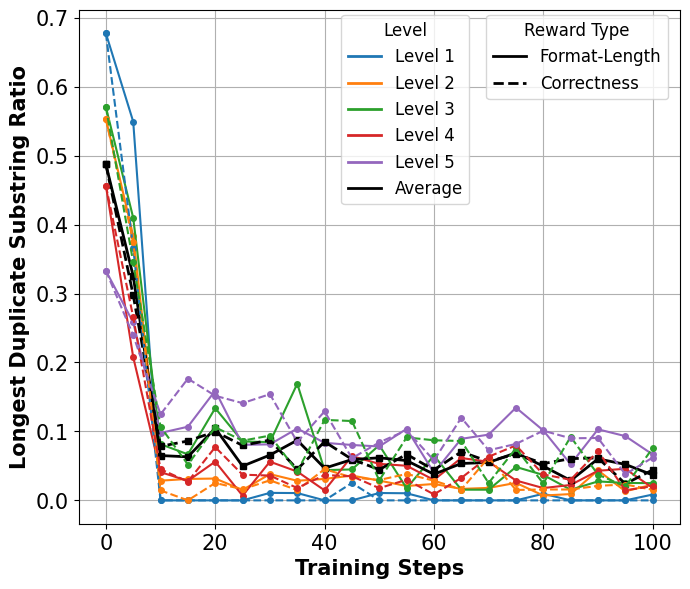

In [228]:
import matplotlib.pyplot as plt
from analyse_log import *
from matplotlib.lines import Line2D

left_bound = 0
right_bound = 100

level_score_dict_exp1, overall_scores_exp1 = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_repetition_by_level_and_overall,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, stats_mode='longest_repeated_substring_ratio', level_range=[1, 5])

level_score_dict_baseline, overall_scores_baseline = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_repetition_by_level_and_overall,
    dataset_suffix="MATH500", start=left_bound, end=right_bound, stats_mode='longest_repeated_substring_ratio', level_range=[1, 5])

# 固定颜色映射
level_colors = {
    1: 'tab:blue',
    2: 'tab:orange',
    3: 'tab:green',
    4: 'tab:red',
    5: 'tab:purple'
}

plt.figure(figsize=(7, 6))  # 宽度拉大一点为 legend 腾空间

# 绘制 exp1（实线）
for level in sorted(level_score_dict_exp1.keys()):
    steps_sorted, avg_scores = level_score_dict_exp1[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=4,
             linestyle='-', color=level_colors[level], label=f"Level {level}")


# 绘制整体平均得分曲线
steps_sorted, avg_overall_scores = zip(*overall_scores_exp1)
plt.plot(steps_sorted, avg_overall_scores, label="Average",  marker='s', markersize=4, linestyle="-", color="black", linewidth=2)

steps_sorted, avg_overall_scores = zip(*overall_scores_baseline)
plt.plot(steps_sorted, avg_overall_scores,  marker='s', markersize=4, linestyle="--", color="black", linewidth=2)


# 绘制 baseline（虚线）
for level in sorted(level_score_dict_baseline.keys()):
    steps_sorted, avg_scores = level_score_dict_baseline[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=4,
             linestyle='--', color=level_colors[level])  # 不重复 label

# 构建 legend 句柄
level_handles = [Line2D([0], [0], color=color, lw=2, label=f"Level {lvl}") 
                 for lvl, color in level_colors.items()]

level_handles.append(Line2D([0], [0], color="black", lw=2, label=f"Average"))

style_handles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Format-Length'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label="Correctness")
]



# 设置图形属性
plt.xlabel("Training Steps", fontsize=15, fontweight='bold')
plt.ylabel("Longest Duplicate Substring Ratio", fontsize=15, fontweight='bold')
#plt.title("MATH500 Longest Duplicate Substring Ratio by Level", fontsize=16)

# 主图右侧外部放置两个图例
legend1 = plt.legend(handles=level_handles, title="Level",
                     bbox_to_anchor=(0.65,  0.99), loc='upper right', fontsize=12 ,title_fontsize=12, borderaxespad=0.)
legend2 = plt.legend(handles=style_handles, title="Reward Type",
                     bbox_to_anchor=(0.98, 0.99), loc='upper right', fontsize=12 ,title_fontsize=12, borderaxespad=0.)
plt.gca().add_artist(legend1)

plt.tick_params(labelsize=15)

plt.grid(True)

plt.tight_layout()  # 自动调整布局

fig_path = '../data/fig/math500_longest_rep_sub.png'

plt.savefig(fig_path)

plt.show()



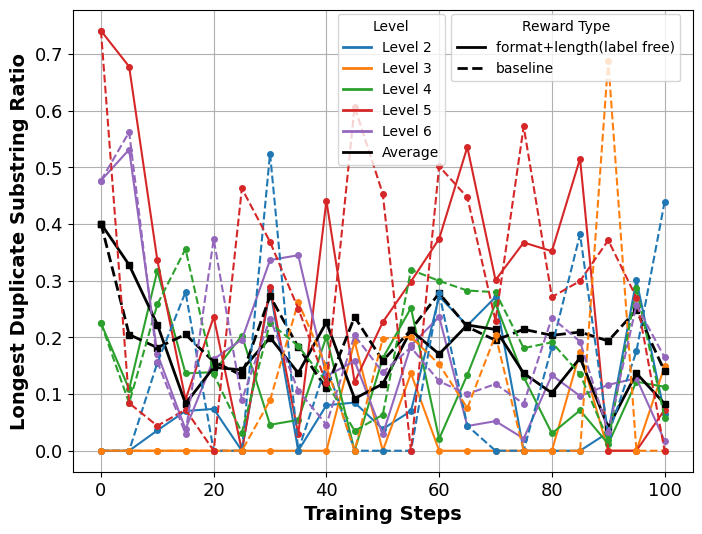

In [17]:
import matplotlib.pyplot as plt
from analyse_log import *
from matplotlib.lines import Line2D

left_bound = 0
right_bound = 100

level_score_dict_exp1, overall_scores_exp1 = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_repetition_by_level_and_overall,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, stats_mode='longest_repeated_substring_ratio', level_range=[2, 6])

level_score_dict_baseline, overall_scores_baseline = level_func_trends(
    '../data/llm_outputs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_repetition_by_level_and_overall,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, stats_mode='longest_repeated_substring_ratio', level_range=[2, 6])

# 固定颜色映射
level_colors = {
    2: 'tab:blue',
    3: 'tab:orange',
    4: 'tab:green',
    5: 'tab:red',
    6: 'tab:purple'
}

plt.figure(figsize=(8, 6))  # 宽度拉大一点为 legend 腾空间

# 绘制 exp1（实线）
for level in sorted(level_score_dict_exp1.keys()):
    steps_sorted, avg_scores = level_score_dict_exp1[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=4,
             linestyle='-', color=level_colors[level], label=f"Level {level}")


# 绘制整体平均得分曲线
steps_sorted, avg_overall_scores = zip(*overall_scores_exp1)
plt.plot(steps_sorted, avg_overall_scores, label="Average",  marker='s', markersize=4, linestyle="-", color="black", linewidth=2)

steps_sorted, avg_overall_scores = zip(*overall_scores_baseline)
plt.plot(steps_sorted, avg_overall_scores,  marker='s', markersize=4, linestyle="--", color="black", linewidth=2)


# 绘制 baseline（虚线）
for level in sorted(level_score_dict_baseline.keys()):
    steps_sorted, avg_scores = level_score_dict_baseline[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=4,
             linestyle='--', color=level_colors[level])  # 不重复 label

# 构建 legend 句柄
level_handles = [Line2D([0], [0], color=color, lw=2, label=f"Level {lvl}") 
                 for lvl, color in level_colors.items()]

level_handles.append(Line2D([0], [0], color="black", lw=2, label=f"Average"))

style_handles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Format-Length'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label="Correctness")
]





# 设置图形属性
plt.xlabel("Training Steps", fontsize=14, fontweight='bold')
plt.ylabel("Longest Duplicate Substring Ratio", fontsize=14, fontweight='bold')
#plt.title("AIME2024 Longest Duplicate Substring Ratio by Level", fontsize=16)

# 主图右侧外部放置两个图例
legend1 = plt.legend(handles=level_handles, title="Level",
                     bbox_to_anchor=(0.6,  0.99), loc='upper right', borderaxespad=0.)
legend2 = plt.legend(handles=style_handles, title="Reward Type",
                     bbox_to_anchor=(0.98, 0.99), loc='upper right', borderaxespad=0.)
plt.gca().add_artist(legend1)

plt.tick_params(labelsize=13)

plt.grid(True)


fig_path = '../data/fig/aime2024_longest_rep_sub.png'

plt.savefig(fig_path)

plt.show()



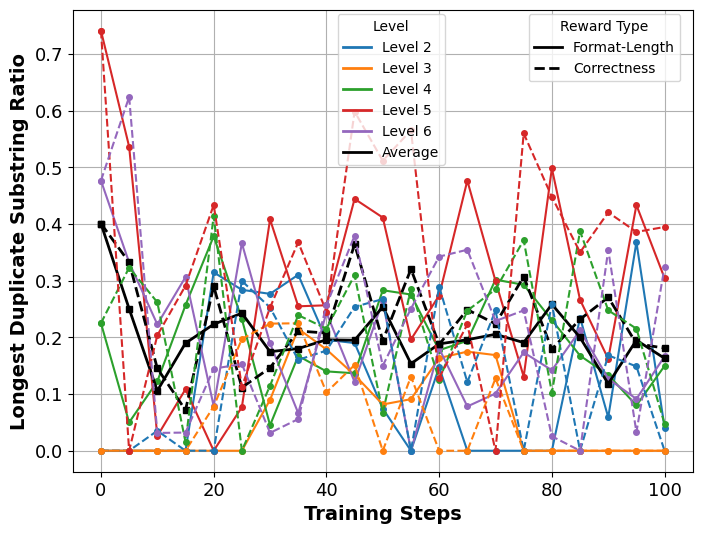

In [7]:
import matplotlib.pyplot as plt
from analyse_log import *
from matplotlib.lines import Line2D

left_bound = 0
right_bound = 100

level_score_dict_exp1, overall_scores_exp1 = level_func_trends(
    '../data/llm_outputs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3',stats_repetition_by_level_and_overall,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, stats_mode='longest_repeated_substring_ratio', level_range=[2, 6])

level_score_dict_baseline, overall_scores_baseline = level_func_trends(
    '../data/llm_outputs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_a_g_f',stats_repetition_by_level_and_overall,
    dataset_suffix="AIME2024", start=left_bound, end=right_bound, stats_mode='longest_repeated_substring_ratio', level_range=[2, 6])

# 固定颜色映射
level_colors = {
    2: 'tab:blue',
    3: 'tab:orange',
    4: 'tab:green',
    5: 'tab:red',
    6: 'tab:purple'
}

plt.figure(figsize=(8, 6))  # 宽度拉大一点为 legend 腾空间

# 绘制 exp1（实线）
for level in sorted(level_score_dict_exp1.keys()):
    steps_sorted, avg_scores = level_score_dict_exp1[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=4,
             linestyle='-', color=level_colors[level], label=f"Level {level}")


# 绘制整体平均得分曲线
steps_sorted, avg_overall_scores = zip(*overall_scores_exp1)
plt.plot(steps_sorted, avg_overall_scores, label="Average",  marker='s', markersize=4, linestyle="-", color="black", linewidth=2)

steps_sorted, avg_overall_scores = zip(*overall_scores_baseline)
plt.plot(steps_sorted, avg_overall_scores,  marker='s', markersize=4, linestyle="--", color="black", linewidth=2)


# 绘制 baseline（虚线）
for level in sorted(level_score_dict_baseline.keys()):
    steps_sorted, avg_scores = level_score_dict_baseline[level]
    plt.plot(steps_sorted, avg_scores, marker='o', markersize=4,
             linestyle='--', color=level_colors[level])  # 不重复 label

# 构建 legend 句柄
level_handles = [Line2D([0], [0], color=color, lw=2, label=f"Level {lvl}") 
                 for lvl, color in level_colors.items()]

level_handles.append(Line2D([0], [0], color="black", lw=2, label=f"Average"))

style_handles = [
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Format-Length'),
    Line2D([0], [0], color='black', linestyle='--', lw=2, label="Correctness")
]





# 设置图形属性
plt.xlabel("Training Steps", fontsize=14, fontweight='bold')
plt.ylabel("Longest Duplicate Substring Ratio", fontsize=14, fontweight='bold')
#plt.title("AIME2024 Longest Duplicate Substring Ratio by Level", fontsize=16)

# 主图右侧外部放置两个图例
legend1 = plt.legend(handles=level_handles, title="Level",
                     bbox_to_anchor=(0.6,  0.99), loc='upper right', borderaxespad=0.)
legend2 = plt.legend(handles=style_handles, title="Reward Type",
                     bbox_to_anchor=(0.98, 0.99), loc='upper right', borderaxespad=0.)
plt.gca().add_artist(legend1)

plt.tick_params(labelsize=13)

plt.grid(True)


fig_path = '../data/fig/aime2024_longest_rep_sub_2.png'

plt.savefig(fig_path)

plt.show()



# 训练日志分析

### response length

In [1]:
from json_utils import *
import re
from collections import defaultdict
import matplotlib.pyplot as plt

baseline_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f/summary.json'

exp1_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3/summary.json'

exp2_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_a/summary.json'

baseline_data = load_json(baseline_path)

exp1_data = load_json(exp1_path)

exp2_data = load_json(exp2_path)



In [145]:
from json_utils import *
import re
from collections import defaultdict
import matplotlib.pyplot as plt

baseline_path = '../data/logs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_a_g_f/summary.json'

exp1_path = '../data/logs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3/summary.json'

exp2_path = '../data/logs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_f_a/summary.json'

baseline_data = load_json(baseline_path)

exp1_data = load_json(exp1_path)

exp2_data = load_json(exp2_path)

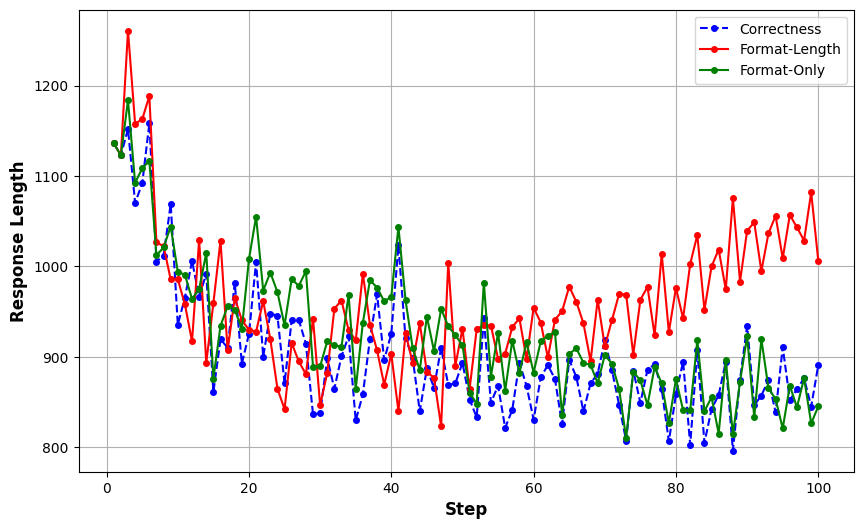

In [2]:
# 每个 step 的 response_length
# start end 控制输出的步数
def compute_response_length(data, start=0, end=-1):
    steps = []
    response_length = []
    for entry in data:

        step = entry['step'] 

        if "response_length/mean" in entry:
        
            steps.append(int(step))
            response_length.append(entry['response_length/mean'])
        

    # 按 step 排序
    steps, response_length = zip(*sorted(zip(steps, response_length)))

    return steps[start: end], response_length[start: end]

left_bound = 0
right_bound = 100

steps_baseline, response_length_baseline = compute_response_length(baseline_data, left_bound, right_bound)

steps_exp1, response_length_exp1 = compute_response_length(exp1_data, left_bound, right_bound)

steps_exp2, response_length_exp2 = compute_response_length(exp2_data, left_bound, right_bound)


# 绘制折线图（3条曲线）
plt.figure(figsize=(10, 6))
plt.plot(steps_baseline, response_length_baseline, marker='o', markersize=4, linestyle='--', color='b', label="Correctness")
plt.plot(steps_exp1, response_length_exp1, marker='o', markersize=4, linestyle='-', color='r', label="Format-Length")
plt.plot(steps_exp2, response_length_exp2, marker='o', markersize=4, linestyle='-', color='g', label="Format-Only")

plt.xlabel("Step", fontsize=12, fontweight='bold')
plt.ylabel("Response Length", fontsize=12, fontweight='bold')
#plt.title("Response Length during training", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


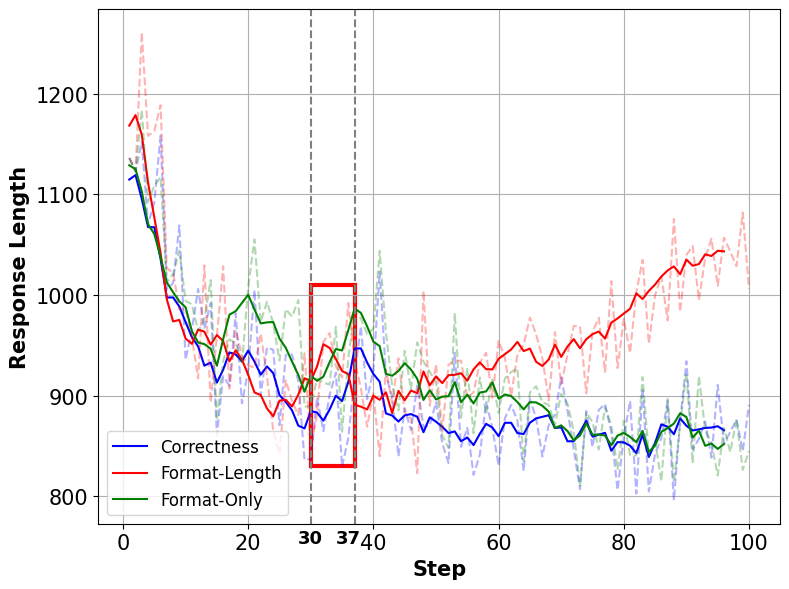

In [4]:
import numpy as np
import matplotlib.patches as patches

def smooth_curve(data, window_size=5):
    """使用滑动平均法平滑曲线"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# 平滑数据
window_size = 5
response_length_baseline_smooth = smooth_curve(response_length_baseline, window_size)
response_length_exp1_smooth = smooth_curve(response_length_exp1, window_size)
response_length_exp2_smooth = smooth_curve(response_length_exp2, window_size)

# 平滑后的步数
steps_smooth = steps_baseline[:len(response_length_baseline_smooth)]

# 绘图
plt.figure(figsize=(8, 6))

# baseline 原始和平滑
plt.plot(steps_baseline, response_length_baseline, linestyle='--', color='b', alpha=0.3)
plt.plot(steps_smooth, response_length_baseline_smooth, linestyle='-', color='b', label="Correctness")

# exp1 原始和平滑
plt.plot(steps_exp1, response_length_exp1, linestyle='--', color='r', alpha=0.3)
plt.plot(steps_smooth, response_length_exp1_smooth, linestyle='-', color='r', label="Format-Length")

# exp2 原始和平滑
plt.plot(steps_exp2, response_length_exp2, linestyle='--', color='g', alpha=0.3)
plt.plot(steps_smooth, response_length_exp2_smooth, linestyle='-', color='g', label="Format-Only")



# 添加竖线
# plt.axvline(x=15, color='gray', linestyle='--', linewidth=1.5)

# 添加竖线
plt.axvline(x=30, color='gray', linestyle='--', linewidth=1.5)

# 添加竖线
plt.axvline(x=37, color='gray', linestyle='--', linewidth=1.5)



# 添加注释
plt.text(28, 750, "30", rotation=0, color='black', fontsize=13, verticalalignment='bottom',fontweight='bold')

# 添加注释
plt.text(34, 750, "37", rotation=0, color='black', fontsize=13, verticalalignment='bottom',fontweight='bold')

# ——— 新增：在 X∈[29,37], Y∈[850,1000] 区域画矩形 ———
ax = plt.gca()
rect = patches.Rectangle(
    (30, 830),            # 左下角坐标
    37 - 30,              # 宽度
    1000 - 820,           # 高度
    linewidth=3,
    edgecolor='RED',
    facecolor='none',     # 如果想要半透明填充，可以改为 facecolor='gray', alpha=0.3
    linestyle='-'
)
ax.add_patch(rect)

# 图形设置
plt.xlabel("Step", fontsize=15, fontweight='bold')
plt.ylabel("Response Length", fontsize=15, fontweight='bold')
# plt.title("response length during training (raw vs smoothed)", fontsize=15)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True)
plt.tight_layout()

ax.tick_params(labelsize=15)

plt.tight_layout()  # 自动调整布局

fig_path = '../data/fig/response_length_100step.png'

plt.savefig(fig_path)


plt.show()


In [264]:

print(response_length_exp1[30])
print(response_length_exp1[98])

(response_length_exp1[95]-response_length_exp1[30])/response_length_exp1[30]

882.133
1081.938


0.198177599069528

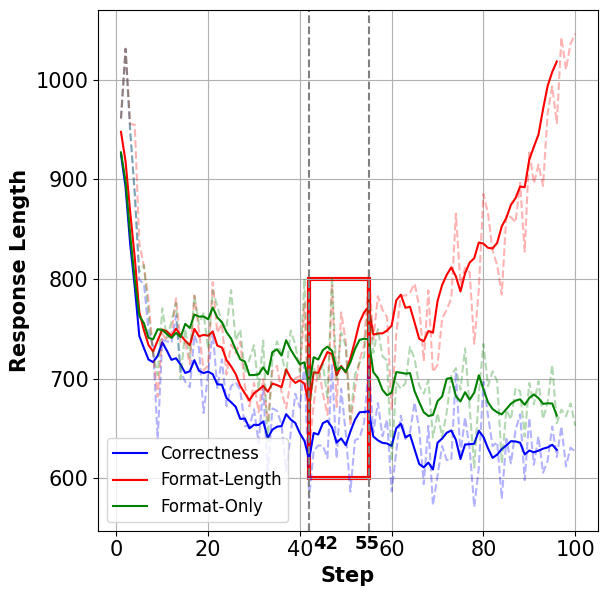

In [147]:
import numpy as np
import matplotlib.patches as patches

def smooth_curve(data, window_size=5):
    """使用滑动平均法平滑曲线"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# 平滑数据
window_size = 5
response_length_baseline_smooth = smooth_curve(response_length_baseline, window_size)
response_length_exp1_smooth = smooth_curve(response_length_exp1, window_size)
response_length_exp2_smooth = smooth_curve(response_length_exp2, window_size)

# 平滑后的步数
steps_smooth = steps_baseline[:len(response_length_baseline_smooth)]

# 绘图
plt.figure(figsize=(6, 6))

# baseline 原始和平滑
plt.plot(steps_baseline, response_length_baseline, linestyle='--', color='b', alpha=0.3)
plt.plot(steps_smooth, response_length_baseline_smooth, linestyle='-', color='b', label="Correctness")

# exp1 原始和平滑
plt.plot(steps_exp1, response_length_exp1, linestyle='--', color='r', alpha=0.3)
plt.plot(steps_smooth, response_length_exp1_smooth, linestyle='-', color='r', label="Format-Length")

# exp2 原始和平滑
plt.plot(steps_exp2, response_length_exp2, linestyle='--', color='g', alpha=0.3)
plt.plot(steps_smooth, response_length_exp2_smooth, linestyle='-', color='g', label="Format-Only")



# 添加竖线
# plt.axvline(x=15, color='gray', linestyle='--', linewidth=1.5)

# 添加竖线
plt.axvline(x=42, color='gray', linestyle='--', linewidth=1.5)

# 添加竖线
plt.axvline(x=55, color='gray', linestyle='--', linewidth=1.5)


# 添加注释
plt.text(43, 525, "42", rotation=0, color='black', fontsize=13, verticalalignment='bottom',fontweight='bold')

# 添加注释
plt.text(52, 525, "55", rotation=0, color='black', fontsize=13, verticalalignment='bottom',fontweight='bold')

# ——— 新增：在 X∈[29,37], Y∈[850,1000] 区域画矩形 ———
ax = plt.gca()
rect = patches.Rectangle(
    (42, 600),            # 左下角坐标
    55 - 42,              # 宽度
    800 - 600,           # 高度
    linewidth=3,
    edgecolor='RED',
    facecolor='none',     # 如果想要半透明填充，可以改为 facecolor='gray', alpha=0.3
    linestyle='-'
)
ax.add_patch(rect)

# 图形设置
plt.xlabel("Step", fontsize=15, fontweight='bold')
plt.ylabel("Response Length", fontsize=15, fontweight='bold')
# plt.title("response length during training (raw vs smoothed)", fontsize=15)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True)
plt.tight_layout()

ax.tick_params(labelsize=15)


fig_path = '../data/fig/response_length_100step_2.png'

plt.savefig(fig_path)


plt.show()


###  clip ratio and response length

In [7]:
from json_utils import *
import re
from collections import defaultdict
import matplotlib.pyplot as plt

baseline_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f/summary.json'

exp1_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3/summary.json'

exp2_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_a/summary.json'

baseline_data = load_json(baseline_path)

exp1_data = load_json(exp1_path)

exp2_data = load_json(exp2_path)


In [10]:
from json_utils import *
import re
from collections import defaultdict
import matplotlib.pyplot as plt

baseline_path = '../data/logs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_a_g_f/summary.json'

exp1_path = '../data/logs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3/summary.json'

exp2_path = '../data/logs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_f_a/summary.json'

baseline_data = load_json(baseline_path)

exp1_data = load_json(exp1_path)

exp2_data = load_json(exp2_path)

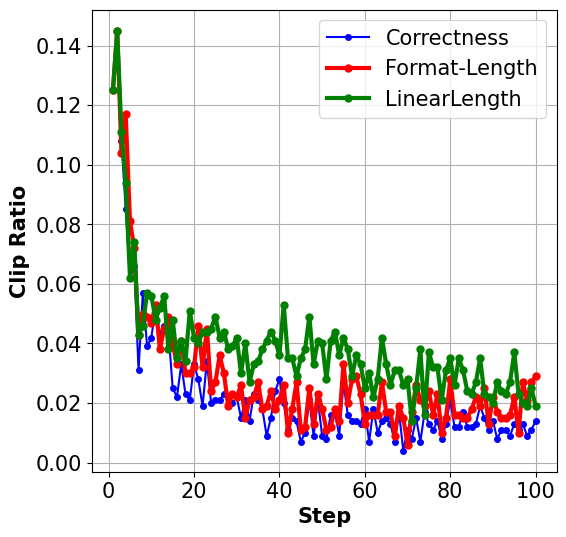

In [11]:
# 每个 step 的 clip_ratio
# start end 控制输出的步数
def compute_clip_ratio(data, start=0, end=-1):
    steps = []
    response_length = []
    for entry in data:

        step = entry['step'] 

        if "response_length/clip_ratio" in entry:
        
            steps.append(int(step))
            response_length.append(entry['response_length/clip_ratio'])
        

    # 按 step 排序
    steps, response_length = zip(*sorted(zip(steps, response_length)))

    return steps[start: end], response_length[start: end]

left_bound = 0
right_bound = 100

steps_baseline, response_length_baseline = compute_clip_ratio(baseline_data, left_bound, right_bound)

steps_exp1, response_length_exp1 = compute_clip_ratio(exp1_data, left_bound, right_bound)

steps_exp2, response_length_exp2 = compute_clip_ratio(exp2_data, left_bound, right_bound)


# 绘制折线图（3条曲线）
plt.figure(figsize=(6, 6))
plt.plot(steps_baseline, response_length_baseline, marker='o', markersize=4, linestyle='-', color='b', label="Correctness")
plt.plot(steps_exp1, response_length_exp1, marker='o', markersize=5, linestyle='-', color='r', linewidth=3,label="Format-Length")
plt.plot(steps_exp2, response_length_exp2, marker='o', markersize=5, linestyle='-', color='g', linewidth=3, label="LinearLength")

plt.xlabel("Step", fontsize=15, fontweight='bold')
plt.ylabel("Clip Ratio", fontsize=15, fontweight='bold')
#plt.title("Clip Ratio during training", fontsize=16)
plt.legend(fontsize=15)

# 坐标轴刻度数字变大
plt.tick_params(labelsize=15)

plt.grid(True)

# fig_path = '../data/fig/clip_ratio_100step.png'

# plt.savefig(fig_path, bbox_inches="tight")

plt.show()



In [12]:
response_length_exp1[-1]

0.029

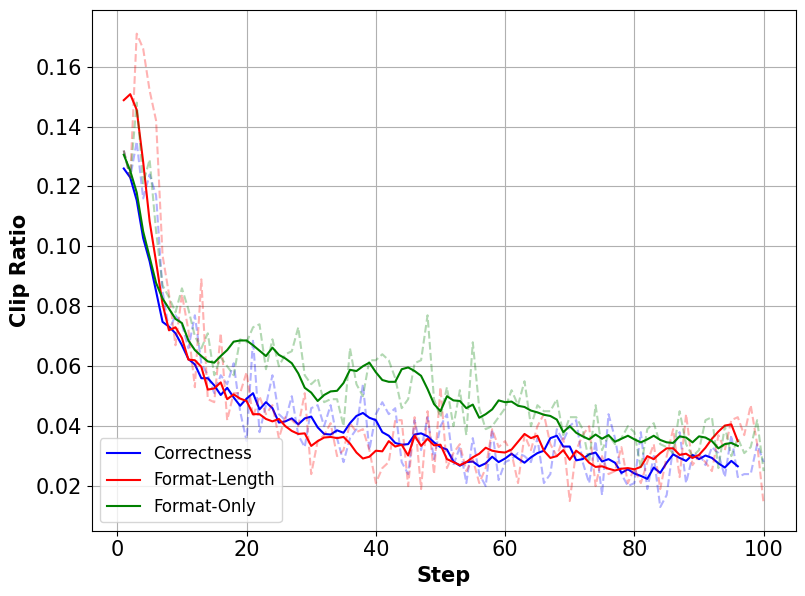

In [9]:
import numpy as np
import matplotlib.patches as patches

def smooth_curve(data, window_size=5):
    """使用滑动平均法平滑曲线"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# 平滑数据
window_size = 5
response_length_baseline_smooth = smooth_curve(response_length_baseline, window_size)
response_length_exp1_smooth = smooth_curve(response_length_exp1, window_size)
response_length_exp2_smooth = smooth_curve(response_length_exp2, window_size)

# 平滑后的步数
steps_smooth = steps_baseline[:len(response_length_baseline_smooth)]

# 绘图
plt.figure(figsize=(8, 6))

# baseline 原始和平滑
plt.plot(steps_baseline, response_length_baseline, linestyle='--', color='b', alpha=0.3)
plt.plot(steps_smooth, response_length_baseline_smooth, linestyle='-', color='b', label="Correctness")

# exp1 原始和平滑
plt.plot(steps_exp1, response_length_exp1, linestyle='--', color='r', alpha=0.3)
plt.plot(steps_smooth, response_length_exp1_smooth, linestyle='-', color='r', label="Format-Length")

# exp2 原始和平滑
plt.plot(steps_exp2, response_length_exp2, linestyle='--', color='g', alpha=0.3)
plt.plot(steps_smooth, response_length_exp2_smooth, linestyle='-', color='g', label="Format-Only")



# 图形设置
plt.xlabel("Step", fontsize=15, fontweight='bold')
plt.ylabel("Clip Ratio", fontsize=15, fontweight='bold')


# plt.title("response length during training (raw vs smoothed)", fontsize=15)
plt.legend(loc='lower left', fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.tick_params(labelsize=15)


fig_path = '../data/fig/clip_ratio_100step.png'

plt.savefig(fig_path)


plt.show()


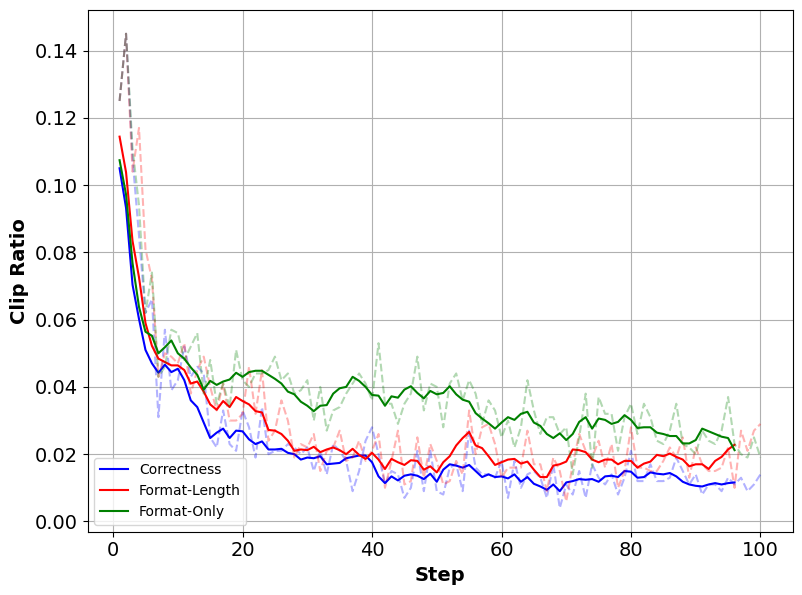

In [13]:
import numpy as np
import matplotlib.patches as patches

def smooth_curve(data, window_size=5):
    """使用滑动平均法平滑曲线"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# 平滑数据
window_size = 5
response_length_baseline_smooth = smooth_curve(response_length_baseline, window_size)
response_length_exp1_smooth = smooth_curve(response_length_exp1, window_size)
response_length_exp2_smooth = smooth_curve(response_length_exp2, window_size)

# 平滑后的步数
steps_smooth = steps_baseline[:len(response_length_baseline_smooth)]

# 绘图
plt.figure(figsize=(8, 6))

# baseline 原始和平滑
plt.plot(steps_baseline, response_length_baseline, linestyle='--', color='b', alpha=0.3)
plt.plot(steps_smooth, response_length_baseline_smooth, linestyle='-', color='b', label="Correctness")

# exp1 原始和平滑
plt.plot(steps_exp1, response_length_exp1, linestyle='--', color='r', alpha=0.3)
plt.plot(steps_smooth, response_length_exp1_smooth, linestyle='-', color='r', label="Format-Length")

# exp2 原始和平滑
plt.plot(steps_exp2, response_length_exp2, linestyle='--', color='g', alpha=0.3)
plt.plot(steps_smooth, response_length_exp2_smooth, linestyle='-', color='g', label="Format-Only")



# 图形设置
plt.xlabel("Step", fontsize=14, fontweight='bold')
plt.ylabel("Clip Ratio", fontsize=14, fontweight='bold')


# plt.title("response length during training (raw vs smoothed)", fontsize=15)
plt.legend(loc='lower left', fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.tick_params(labelsize=14)


fig_path = '../data/fig/clip_ratio_100step_2.png'

plt.savefig(fig_path)


plt.show()


#### 50step

In [36]:
from json_utils import *
import re
from collections import defaultdict
import matplotlib.pyplot as plt

baseline_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f/summary.json'

exp1_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3/summary.json'

exp3_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f_l/summary.json'

baseline_data = load_json(baseline_path)

exp1_data = load_json(exp1_path)

exp3_data = load_json(exp3_path)


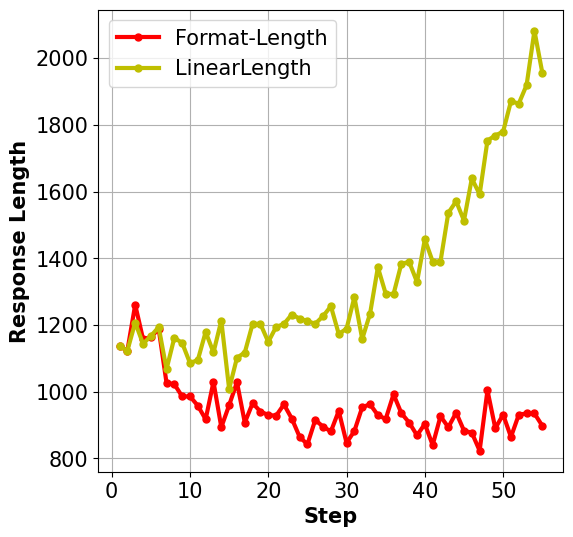

In [31]:
# 每个 step 的 response_length
# start end 控制输出的步数
def compute_response_length(data, start=0, end=-1):
    steps = []
    response_length = []
    for entry in data:

        step = entry['step'] 

        if "response_length/mean" in entry:
        
            steps.append(int(step))
            response_length.append(entry['response_length/mean'])
        

    # 按 step 排序
    steps, response_length = zip(*sorted(zip(steps, response_length)))

    return steps[start: end], response_length[start: end]

left_bound = 0
right_bound = 55

steps_baseline, response_length_baseline = compute_response_length(baseline_data, left_bound, right_bound)

steps_exp1, response_length_exp1 = compute_response_length(exp1_data, left_bound, right_bound)

steps_exp3, response_length_exp3 = compute_response_length(exp3_data, left_bound, right_bound)


# 绘制折线图（3条曲线）
plt.figure(figsize=(6, 6))
# plt.plot(steps_baseline, response_length_baseline, marker='o', markersize=4, linestyle='--', color='b', label="Correctness")
plt.plot(steps_exp1, response_length_exp1, marker='o', markersize=5, linestyle='-', color='r', linewidth=3,label="Format-Length")
plt.plot(steps_exp3, response_length_exp3, marker='o', markersize=5, linestyle='-', color='y', linewidth=3, label="LinearLength")

plt.xlabel("Step", fontsize=15, fontweight='bold')
plt.ylabel("Response Length", fontsize=15, fontweight='bold')
#plt.title("Response Length during training", fontsize=16)
plt.legend(fontsize=15)

# 坐标轴刻度数字变大
plt.tick_params(labelsize=15)

plt.grid(True)

fig_path = '../data/fig/response_length_50step.png'

plt.savefig(fig_path, bbox_inches="tight")

plt.show()



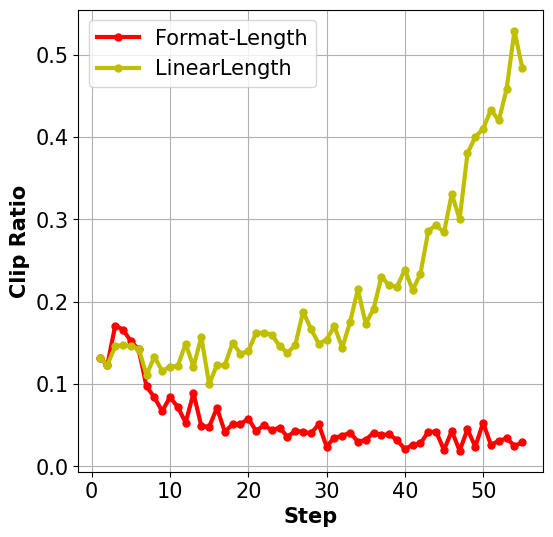

In [32]:
# 每个 step 的 clip_ratio
# start end 控制输出的步数
def compute_clip_ratio(data, start=0, end=-1):
    steps = []
    response_length = []
    for entry in data:

        step = entry['step'] 

        if "response_length/clip_ratio" in entry:
        
            steps.append(int(step))
            response_length.append(entry['response_length/clip_ratio'])
        

    # 按 step 排序
    steps, response_length = zip(*sorted(zip(steps, response_length)))

    return steps[start: end], response_length[start: end]

left_bound = 0
right_bound = 55

steps_baseline, response_length_baseline = compute_clip_ratio(baseline_data, left_bound, right_bound)

steps_exp1, response_length_exp1 = compute_clip_ratio(exp1_data, left_bound, right_bound)

steps_exp3, response_length_exp3 = compute_clip_ratio(exp3_data, left_bound, right_bound)


# 绘制折线图（3条曲线）
plt.figure(figsize=(6, 6))
# plt.plot(steps_baseline, response_length_baseline, marker='o', markersize=4, linestyle='--', color='b', label="Correctness")
plt.plot(steps_exp1, response_length_exp1, marker='o', markersize=5, linestyle='-', color='r', linewidth=3,label="Format-Length")
plt.plot(steps_exp3, response_length_exp3, marker='o', markersize=5, linestyle='-', color='y', linewidth=3, label="LinearLength")

plt.xlabel("Step", fontsize=15, fontweight='bold')
plt.ylabel("Clip Ratio", fontsize=15, fontweight='bold')
#plt.title("Clip Ratio during training", fontsize=16)
plt.legend(fontsize=15)

# 坐标轴刻度数字变大
plt.tick_params(labelsize=15)

plt.grid(True)

fig_path = '../data/fig/clip_ratio_50step.png'

plt.savefig(fig_path, bbox_inches="tight")

plt.show()



In [29]:
response_length_exp3[-2]
# steps_exp3[-2]

0.529

### accuracy

In [2]:
from json_utils import *
import re
from collections import defaultdict
import matplotlib.pyplot as plt
from analyse_log import *

baseline_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f/summary.json'

# exp1_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a/summary.json'

exp1_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3/summary.json'


exp2_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_a/summary.json'

# exp3_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f_l/summary.json'

baseline_data = load_json(baseline_path)

exp1_data = load_json(exp1_path)

exp2_data = load_json(exp2_path)

# exp3_data = load_json(exp3_path)


In [11]:
from json_utils import *
import re
from collections import defaultdict
import matplotlib.pyplot as plt
from analyse_log import *

baseline_path = '../data/logs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_a_g_f/summary.json'

exp1_path = '../data/logs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3/summary.json'

exp2_path = '../data/logs/grpo-math-7b_math-bs_128-3k-zs_qwen-r_f_a/summary.json'


baseline_data = load_json(baseline_path)

exp1_data = load_json(exp1_path)

exp2_data = load_json(exp2_path)



#### MATH500

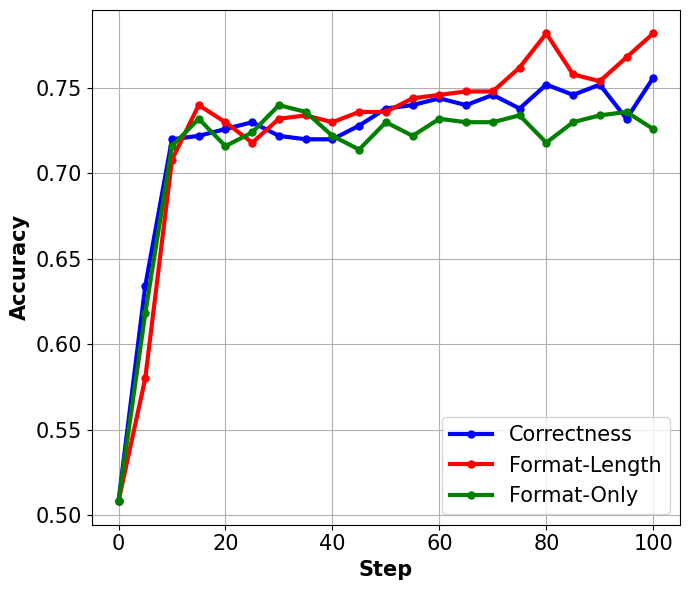

In [235]:

# 每个 step 的 accuracy
# start end 控制输出的步数
def compute_accuracy(data, start=0, end=float('inf')):
    
    steps = []
    acc = []
        
    
    for entry in data:

        step = entry['step'] 

        if step >=start and step <= end:

            if "val/test_score/MATH500" in entry:
            
                steps.append(int(step))
                acc.append(entry['val/test_score/MATH500'])

                    
    # 排序并解包
    sorted_pairs = sorted(zip(steps, acc))
    steps, acc   = map(list, zip(*sorted_pairs))
    
    return steps, acc


left_bound = 0
right_bound = 100

steps_baseline, acc_baseline = compute_accuracy(baseline_data, left_bound, right_bound)
steps_exp1, acc_exp1 = compute_accuracy(exp1_data, left_bound, right_bound)
steps_exp2, acc_exp2 = compute_accuracy(exp2_data, left_bound, right_bound)


# 绘制折线图（3条曲线）
plt.figure(figsize=(7, 6))
plt.plot(steps_baseline, acc_baseline, marker='o', markersize=5, linestyle='-', color='b', linewidth=3,label="Correctness")
plt.plot(steps_exp1, acc_exp1, marker='o', markersize=5, linestyle='-', color='r',linewidth=3, label="Format-Length")
plt.plot(steps_exp2, acc_exp2, marker='o', markersize=5, linestyle='-', color='g',linewidth=3, label="Format-Only")

# 添加竖线
# plt.axvline(x=10, color='gray', linestyle='--', linewidth=1.5)

# 添加注释
# plt.text(8, 0.475, "10", rotation=0, color='black', fontsize=13, verticalalignment='bottom', fontweight='bold')




plt.xlabel("Step", fontsize=15, fontweight='bold')
plt.ylabel("Accuracy", fontsize=15, fontweight='bold')
#plt.title("MATH500 accuracy during training", fontsize=16)

plt.legend(fontsize=15)
plt.tick_params(labelsize=15)
plt.grid(True)

fig_path = '../data/fig/math500_acc_100step.png'

plt.tight_layout()  # 自动调整布局

plt.savefig(fig_path)

plt.show()




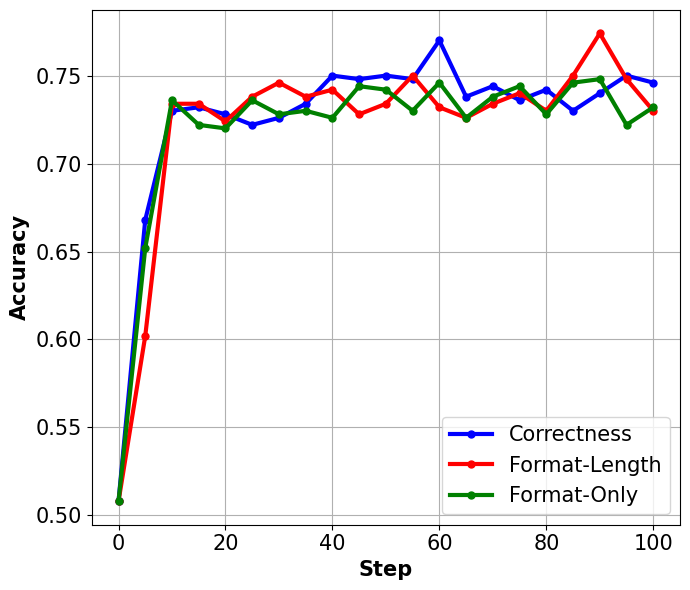

In [210]:

# 每个 step 的 accuracy
# start end 控制输出的步数
def compute_accuracy(data, start=0, end=float('inf')):
    
    steps = []
    acc = []
        
    
    for entry in data:

        step = entry['step'] 

        if step >=start and step <= end:

            if "val/test_score/MATH500" in entry:
            
                steps.append(int(step))
                acc.append(entry['val/test_score/MATH500'])

                    
    # 排序并解包
    sorted_pairs = sorted(zip(steps, acc))
    steps, acc   = map(list, zip(*sorted_pairs))
    
    return steps, acc


left_bound = 0
right_bound = 100

steps_baseline, acc_baseline = compute_accuracy(baseline_data, left_bound, right_bound)
steps_exp1, acc_exp1 = compute_accuracy(exp1_data, left_bound, right_bound)
steps_exp2, acc_exp2 = compute_accuracy(exp2_data, left_bound, right_bound)


# 绘制折线图（3条曲线）
plt.figure(figsize=(7, 6))
plt.plot(steps_baseline, acc_baseline, marker='o', markersize=5, linestyle='-', color='b', linewidth=3,label="Correctness")
plt.plot(steps_exp1, acc_exp1, marker='o', markersize=5, linestyle='-', color='r',linewidth=3, label="Format-Length")
plt.plot(steps_exp2, acc_exp2, marker='o', markersize=5, linestyle='-', color='g',linewidth=3, label="Format-Only")

# 添加竖线
# plt.axvline(x=10, color='gray', linestyle='--', linewidth=1.5)

# 添加注释
# plt.text(8, 0.475, "10", rotation=0, color='black', fontsize=13, verticalalignment='bottom', fontweight='bold')




plt.xlabel("Step", fontsize=15, fontweight='bold')
plt.ylabel("Accuracy", fontsize=15, fontweight='bold')
#plt.title("MATH500 accuracy during training", fontsize=16)

plt.legend(fontsize=15)
plt.tick_params(labelsize=15)
plt.grid(True)

fig_path = '../data/fig/math500_acc_100step_2.png'

plt.tight_layout()  # 自动调整布局

plt.savefig(fig_path)

plt.show()




In [208]:
# (0.5303333333333332, 17)
# (0.5676666666666667, 19)
# (0.5156666666666667, 20)

# (0.521, 17)
# (0.5573333333333333, 20)
# (0.5083333333333333, 6)

print(acc_baseline[17])
print(acc_exp1[20])
print(acc_exp2[6])


0.73
0.73
0.728


In [ ]:
acc_baseline[0] # 
acc_baseline[2] # 

# acc_baseline[-1] # 0.766
# acc_exp2[-1] # 0.746
# acc_exp1[-1] # 0.792

# max(acc_baseline) # 0.766
# max(acc_exp2) # 0.758
# max(acc_exp1) # 0.804

In [54]:
acc_baseline[-1]

0.756

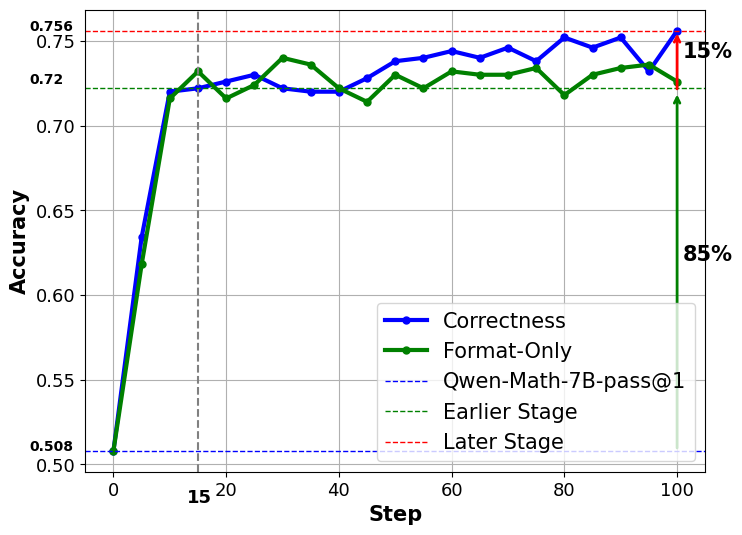

In [17]:

# 每个 step 的 accuracy
# start end 控制输出的步数
def compute_accuracy(data, start=0, end=float('inf')):
    
    steps = []
    acc = []
        
    
    for entry in data:

        step = entry['step'] 

        if step >=start and step <= end:

            if "val/test_score/MATH500" in entry:
            
                steps.append(int(step))
                acc.append(entry['val/test_score/MATH500'])

                    
    # 排序并解包
    sorted_pairs = sorted(zip(steps, acc))
    steps, acc   = map(list, zip(*sorted_pairs))
    
    return steps, acc


left_bound = 0
right_bound = 100

steps_baseline, acc_baseline = compute_accuracy(baseline_data, left_bound, right_bound)
steps_exp1, acc_exp1 = compute_accuracy(exp1_data, left_bound, right_bound)
steps_exp2, acc_exp2 = compute_accuracy(exp2_data, left_bound, right_bound)


# 绘制折线图（3条曲线）
plt.figure(figsize=(8, 6))
plt.plot(steps_baseline, acc_baseline, marker='o', markersize=5, linestyle='-', color='b', linewidth=3,label="Correctness")
# plt.plot(steps_exp1, acc_exp1, marker='o', markersize=5, linestyle='-', color='r',linewidth=3, label="Format-Length")
plt.plot(steps_exp2, acc_exp2, marker='o', markersize=5, linestyle='-', color='g',linewidth=3, label="Format-Only")

# 添加竖线
plt.axvline(x=15, color='gray', linestyle='--', linewidth=1.5)



# 添加注释
plt.text(13, 0.475, "15", rotation=0, color='black', fontsize=13, verticalalignment='bottom', fontweight='bold')

# 添加横线
plt.axhline(y=0.508, color='b', linestyle='--', linewidth=1, label='Qwen-Math-7B-pass@1')

plt.axhline(y=0.722, color='g', linestyle='--', linewidth=1, label='Earlier Stage')

plt.axhline(y=0.756, color='r', linestyle='--', linewidth=1, label='Later Stage')


# 添加注释
plt.text(-15, 0.508, "0.508", rotation=0, color='black', fontsize=10, fontweight='bold')

plt.text(-15, 0.725, "0.72", rotation=0, color='black', fontsize=10, fontweight='bold')

plt.text(-15, 0.756, "0.756", rotation=0, color='black', fontsize=10, fontweight='bold')

# 添加箭头表示提升的幅度
plt.annotate('', xy=(100, 0.72), xytext=(100, 0.508),
             arrowprops=dict(facecolor='green', edgecolor='green', arrowstyle='->', lw=2))

plt.annotate('', xy=(100, 0.756), xytext=(100, 0.72),
             arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', lw=2))

plt.text(101, 0.62, "85%", rotation=0, color='black', fontsize=15, fontweight='bold')

plt.text(101, 0.74, "15%", rotation=0, color='black', fontsize=15, fontweight='bold')


plt.xlabel("Step", fontsize=15, fontweight='bold')
plt.ylabel("Accuracy", fontsize=15, fontweight='bold')
#plt.title("MATH500 accuracy during training", fontsize=16)

plt.legend(fontsize=15 ,loc='lower right')
plt.tick_params(labelsize=13)
plt.grid(True)

fig_path = '../data/fig/math500_acc_100step_baseline.png'

plt.savefig(fig_path, bbox_inches="tight")

plt.show()




In [14]:
print(acc_baseline[-1])
print(acc_baseline[2])

0.756
0.72


In [11]:
(0.72-0.508)/(0.756-0.508)

0.8548387096774193

#### AIME2024

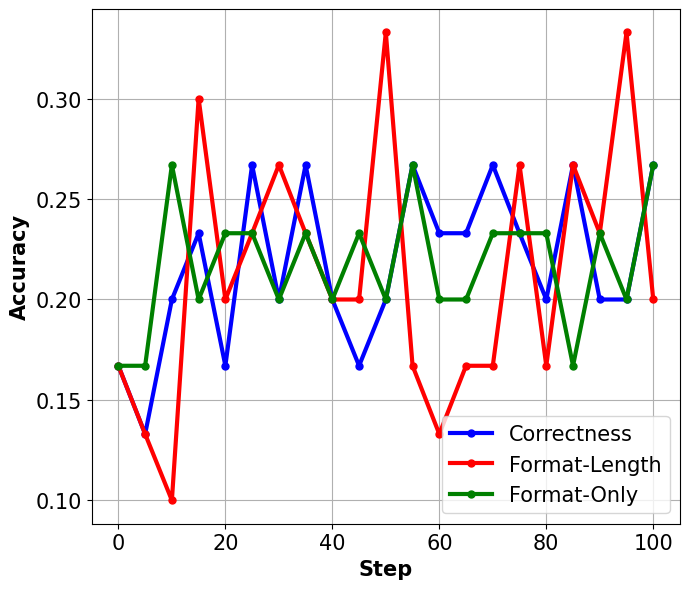

In [216]:

# 每个 step 的 accuracy
# start end 控制输出的步数
def compute_accuracy(data, start=0, end=float('inf')):
    
    steps = []
    acc = []
        
    
    for entry in data:

        step = entry['step'] 

        if step >=start and step <= end:

            if "val/test_score/AIME2024" in entry:
            
                steps.append(int(step))
                acc.append(entry['val/test_score/AIME2024'])

                    
    # 排序并解包
    sorted_pairs = sorted(zip(steps, acc))
    steps, acc   = map(list, zip(*sorted_pairs))
    
    return steps, acc


left_bound = 0
right_bound = 100

steps_baseline, acc_baseline = compute_accuracy(baseline_data, left_bound, right_bound)
steps_exp1, acc_exp1 = compute_accuracy(exp1_data, left_bound, right_bound)
steps_exp2, acc_exp2 = compute_accuracy(exp2_data, left_bound, right_bound)


# 绘制折线图（3条曲线）
plt.figure(figsize=(7, 6))
plt.plot(steps_baseline, acc_baseline, marker='o', markersize=5, linestyle='-', color='b', linewidth=3,label="Correctness")
plt.plot(steps_exp1, acc_exp1, marker='o', markersize=5, linestyle='-', color='r',linewidth=3, label="Format-Length")
plt.plot(steps_exp2, acc_exp2, marker='o', markersize=5, linestyle='-', color='g',linewidth=3, label="Format-Only")


plt.xlabel("Step", fontsize=15, fontweight='bold')
plt.ylabel("Accuracy", fontsize=15, fontweight='bold')
#plt.title("AIME2024 accuracy during training", fontsize=16)

plt.legend(fontsize=15)
plt.tick_params(labelsize=15)
plt.grid(True)

plt.tight_layout()  # 自动调整布局

fig_path = '../data/fig/aime2024_acc_100step.png'

plt.savefig(fig_path)


plt.show()




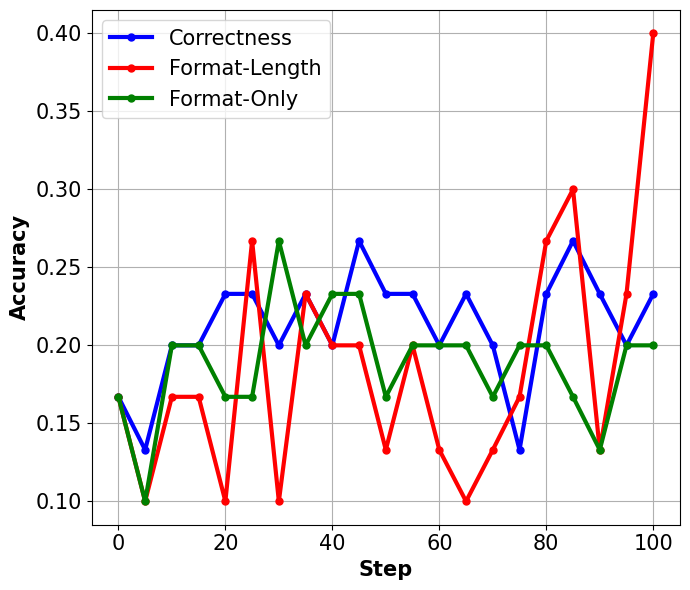

In [12]:

# 每个 step 的 accuracy
# start end 控制输出的步数
def compute_accuracy(data, start=0, end=float('inf')):
    
    steps = []
    acc = []
        
    
    for entry in data:

        step = entry['step'] 

        if step >=start and step <= end:

            if "val/test_score/AIME2024" in entry:
            
                steps.append(int(step))
                acc.append(entry['val/test_score/AIME2024'])

                    
    # 排序并解包
    sorted_pairs = sorted(zip(steps, acc))
    steps, acc   = map(list, zip(*sorted_pairs))
    
    return steps, acc


left_bound = 0
right_bound = 100

steps_baseline, acc_baseline = compute_accuracy(baseline_data, left_bound, right_bound)
steps_exp1, acc_exp1 = compute_accuracy(exp1_data, left_bound, right_bound)
steps_exp2, acc_exp2 = compute_accuracy(exp2_data, left_bound, right_bound)


# 绘制折线图（3条曲线）
plt.figure(figsize=(7, 6))
plt.plot(steps_baseline, acc_baseline, marker='o', markersize=5, linestyle='-', color='b', linewidth=3,label="Correctness")
plt.plot(steps_exp1, acc_exp1, marker='o', markersize=5, linestyle='-', color='r',linewidth=3, label="Format-Length")
plt.plot(steps_exp2, acc_exp2, marker='o', markersize=5, linestyle='-', color='g',linewidth=3, label="Format-Only")


plt.xlabel("Step", fontsize=15, fontweight='bold')
plt.ylabel("Accuracy", fontsize=15, fontweight='bold')
#plt.title("AIME2024 accuracy during training", fontsize=16)

plt.legend(fontsize=15)
plt.tick_params(labelsize=15)
plt.grid(True)

plt.tight_layout()  # 自动调整布局

fig_path = '../data/fig/aime2024_acc_100step_2.png'

plt.savefig(fig_path)


plt.show()




In [220]:
# (0.5303333333333332, 17)
# (0.5676666666666667, 19)
# (0.5156666666666667, 20)

# print(acc_baseline[17])
# print(acc_exp1[19])
# print(acc_exp2[20])

print(acc_baseline[17])
print(acc_exp1[20])
print(acc_exp2[6])





0.267
0.4
0.267


In [114]:
acc_baseline[0] # 0.167

acc_baseline[-1] # 0.2
acc_exp2[-1] # 0.333
acc_exp1[-1] # 0.267

max(acc_baseline) # 0.267
max(acc_exp2) # 0.333
max(acc_exp1) # 0.3

0.3

#### AMC2023

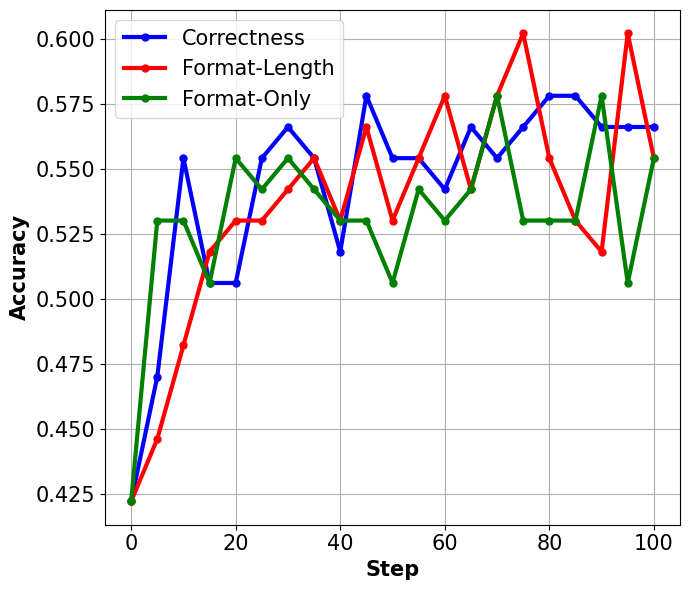

In [217]:

# 每个 step 的 accuracy
# start end 控制输出的步数
def compute_accuracy(data, start=0, end=float('inf')):
    
    steps = []
    acc = []
        
    
    for entry in data:

        step = entry['step'] 

        if step >=start and step <= end:

            if "val/test_score/AMC2023" in entry:
            
                steps.append(int(step))
                acc.append(entry['val/test_score/AMC2023'])

                    
    # 排序并解包
    sorted_pairs = sorted(zip(steps, acc))
    steps, acc   = map(list, zip(*sorted_pairs))
    
    return steps, acc


left_bound = 0
right_bound = 100

steps_baseline, acc_baseline = compute_accuracy(baseline_data, left_bound, right_bound)
steps_exp1, acc_exp1 = compute_accuracy(exp1_data, left_bound, right_bound)
steps_exp2, acc_exp2 = compute_accuracy(exp2_data, left_bound, right_bound)


# 绘制折线图（3条曲线）
plt.figure(figsize=(7, 6))
plt.plot(steps_baseline, acc_baseline, marker='o', markersize=5, linestyle='-', color='b', linewidth=3,label="Correctness")
plt.plot(steps_exp1, acc_exp1, marker='o', markersize=5, linestyle='-', color='r',linewidth=3, label="Format-Length")
plt.plot(steps_exp2, acc_exp2, marker='o', markersize=5, linestyle='-', color='g',linewidth=3, label="Format-Only")

plt.xlabel("Step", fontsize=15, fontweight='bold')
plt.ylabel("Accuracy", fontsize=15, fontweight='bold')
#plt.title("AMC2023 accuracy during training", fontsize=16)

plt.legend(fontsize=15)
plt.tick_params(labelsize=15)
plt.grid(True)

plt.tight_layout()  # 自动调整布局

fig_path = '../data/fig/amc2023_acc_100step.png'

plt.savefig(fig_path)

plt.show()



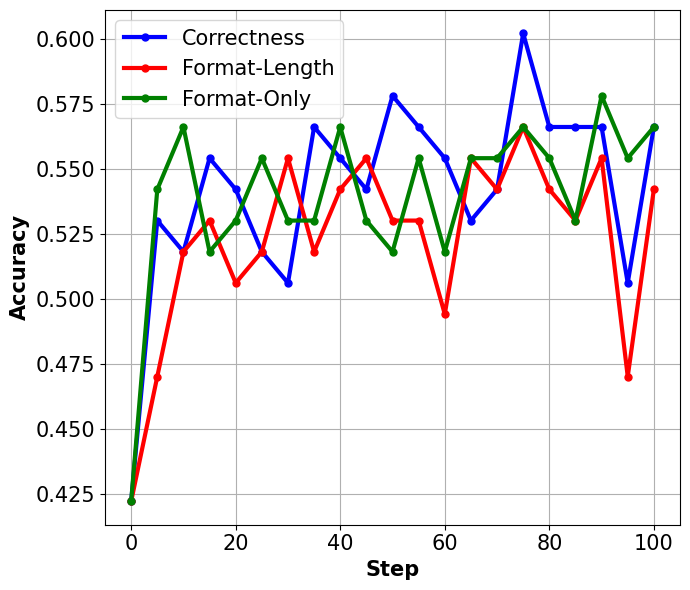

In [221]:

# 每个 step 的 accuracy
# start end 控制输出的步数
def compute_accuracy(data, start=0, end=float('inf')):
    
    steps = []
    acc = []
        
    
    for entry in data:

        step = entry['step'] 

        if step >=start and step <= end:

            if "val/test_score/AMC2023" in entry:
            
                steps.append(int(step))
                acc.append(entry['val/test_score/AMC2023'])

                    
    # 排序并解包
    sorted_pairs = sorted(zip(steps, acc))
    steps, acc   = map(list, zip(*sorted_pairs))
    
    return steps, acc


left_bound = 0
right_bound = 100

steps_baseline, acc_baseline = compute_accuracy(baseline_data, left_bound, right_bound)
steps_exp1, acc_exp1 = compute_accuracy(exp1_data, left_bound, right_bound)
steps_exp2, acc_exp2 = compute_accuracy(exp2_data, left_bound, right_bound)


# 绘制折线图（3条曲线）
plt.figure(figsize=(7, 6))
plt.plot(steps_baseline, acc_baseline, marker='o', markersize=5, linestyle='-', color='b', linewidth=3,label="Correctness")
plt.plot(steps_exp1, acc_exp1, marker='o', markersize=5, linestyle='-', color='r',linewidth=3, label="Format-Length")
plt.plot(steps_exp2, acc_exp2, marker='o', markersize=5, linestyle='-', color='g',linewidth=3, label="Format-Only")

plt.xlabel("Step", fontsize=15, fontweight='bold')
plt.ylabel("Accuracy", fontsize=15, fontweight='bold')
#plt.title("AMC2023 accuracy during training", fontsize=16)

plt.legend(fontsize=15)
plt.tick_params(labelsize=15)
plt.grid(True)

plt.tight_layout()  # 自动调整布局

fig_path = '../data/fig/amc2023_acc_100step_2.png'

plt.savefig(fig_path)

plt.show()



In [34]:
# (0.5303333333333332, 17)
# (0.5676666666666667, 19)
# (0.5156666666666667, 20)

# print(acc_baseline[17])
# print(acc_exp1[19])
# print(acc_exp2[20])

print(acc_baseline[17])
print(acc_exp1[20])
print(acc_exp2[6])

0.566
0.542
0.53


In [135]:
acc_baseline[0] # 0.422
# acc_exp2[0] # 0.446

acc_baseline[-1] # 0.602
acc_exp2[-1] # 0.542
acc_exp1[-1] # 0.53

# max(acc_baseline) # 0.627
# max(acc_exp2) # 0.602
max(acc_exp1) # 0.578


0.578

#### ALL

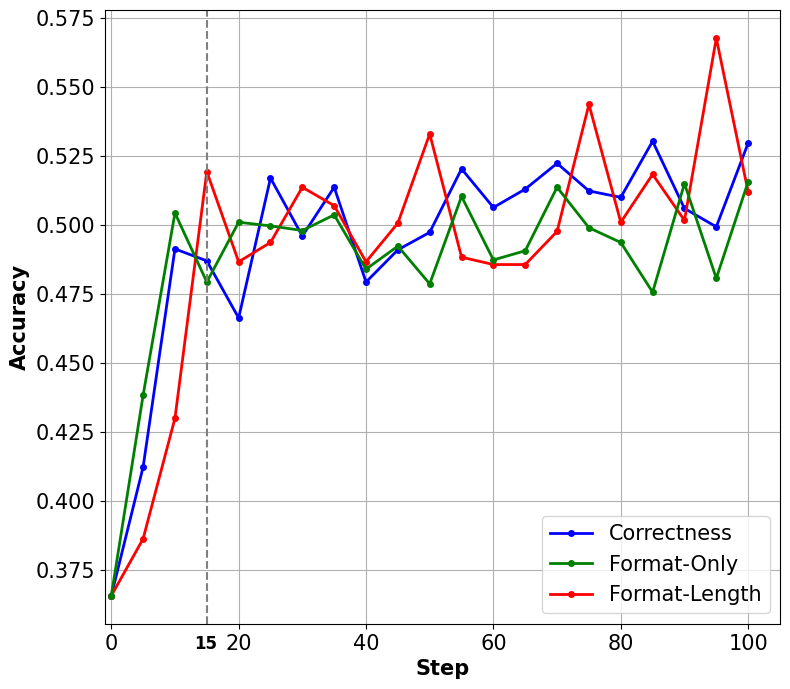

In [256]:
import matplotlib.pyplot as plt
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch
from matplotlib.transforms import Affine2D
import matplotlib.font_manager as fm



left_bound = 0
right_bound = 100

steps_baseline, acc_baseline = compute_accuracy_avg(baseline_data, left_bound, right_bound)
steps_exp1, acc_exp1 = compute_accuracy_avg(exp1_data, left_bound, right_bound)
steps_exp2, acc_exp2 = compute_accuracy_avg(exp2_data, left_bound, right_bound)

fig, ax = plt.subplots(figsize=(8, 7))

# 绘制折线图（3条曲线）
# ax.figure(figsize=(10, 6))
ax.plot(steps_baseline, acc_baseline, marker='o', markersize=4, linestyle='-', color='b', linewidth=2, label="Correctness")
ax.plot(steps_exp1, acc_exp1, marker='o', markersize=4, linestyle='-', color='r', linewidth=2, label="Format-Length")
ax.plot(steps_exp2, acc_exp2, marker='o', markersize=4, linestyle='-', color='g', linewidth=2, label="Format-Only")

# 添加竖线
ax.axvline(x=15, color='gray', linestyle='--', linewidth=1.5)


# 添加横线
# ax.axhline(y=0.67, color='black', linestyle='--', linewidth=1)

# 添加横线
# ax.axhline(y=0.74, color='black', linestyle='--', linewidth=1)

# 添加横线
# ax.axhline(y=0.366, color='b', linestyle='--', linewidth=1, label='Qwen-Math-7B-pass@1')      # 36.6%

# ax.axhline(y=0.834, color='deeppink', linestyle='--', linewidth=1, label='Qwen-Math-7B-pass@64')  # 83.4%

# ax.axhline(y=0.528, color='#17becf', linestyle='--', linewidth=1, label='LIMR-7B')               # 52.8%

# ax.axhline(y=0.533, color='#2ca02c', linestyle='--', linewidth=1, label='SimpleRL-Zero-7B')       # 53.3%

# ax.axhline(y=0.600, color='#1f77b4', linestyle='--', linewidth=1, label='Oat-Zero-7B')             # 60.0%

# ax.axhline(y=0.518, color='purple', linestyle='--', linewidth=1, label='Qwen2.5-Math-7B-Instruct')

# 添加注释
ax.text(13, 0.345, "15", rotation=0, color='black', fontsize=12, verticalalignment='bottom',fontweight='bold')



# 添加虚化效果
# ax.axvspan(xmin=15, xmax=130, ymin=0, ymax=1, color='gray', alpha=0.25)


ax.set_xlabel("Step", fontsize=15, fontweight='bold')
ax.set_ylabel("Accuracy", fontsize=15, fontweight='bold')
# ax.set_title("average accuracy during training", fontsize=15)

# ax.legend(loc='lower right', fontsize=10)

# 获取所有 legend 句柄和标签
handles, labels = ax.get_legend_handles_labels()

# 创建一个映射用于排序
order = {
    "Qwen-Math-7B-pass@64": 0,
    # "Qwen-Math-7B-pass@1": 1,
    "Oat-Zero-7B": 2, 
    "SimpleRL-Zero-7B": 3, #
    "LIMR-7B": 4,
    "Qwen2.5-Math-7B-Instruct":4.5,
    "Correctness": 5,
    "Format-Only": 6,
    "Format-Length": 7,
    "Format-Only(SOTA)": 8,
    "Qwen-Math-7B-pass@1": 9,
}

# 根据顺序排序
sorted_items = sorted(zip(handles, labels), key=lambda x: order.get(x[1], 999))
sorted_handles, sorted_labels = zip(*sorted_items)

# 设置 legend，顺序为排序后的顺序
ax.legend(sorted_handles, sorted_labels, loc='lower right', fontsize=15)



ax.grid(True)

ax.set_xlim(left=-1)
ax.set_xlim(right=right_bound+5)

# ax.set_ylim(bottom=0.2)

ax.tick_params(labelsize=15)

plt.tight_layout()  # 自动调整布局

fig_path = '../data/fig/avg_acc_all_100step.png'

plt.savefig(fig_path)


plt.show()



In [257]:
mid=30
end=95

print('mid step score:{}, end step score:{}, 提升幅度: {}'.format(acc_exp1[int(mid/5)], acc_exp1[int(end/5)], (acc_exp1[int(end/5)]-acc_exp1[int(mid/5)])/acc_exp1[int(mid/5)] ))




mid step score:0.5136666666666666, end step score:0.5676666666666667, 提升幅度: 0.10512654120700854


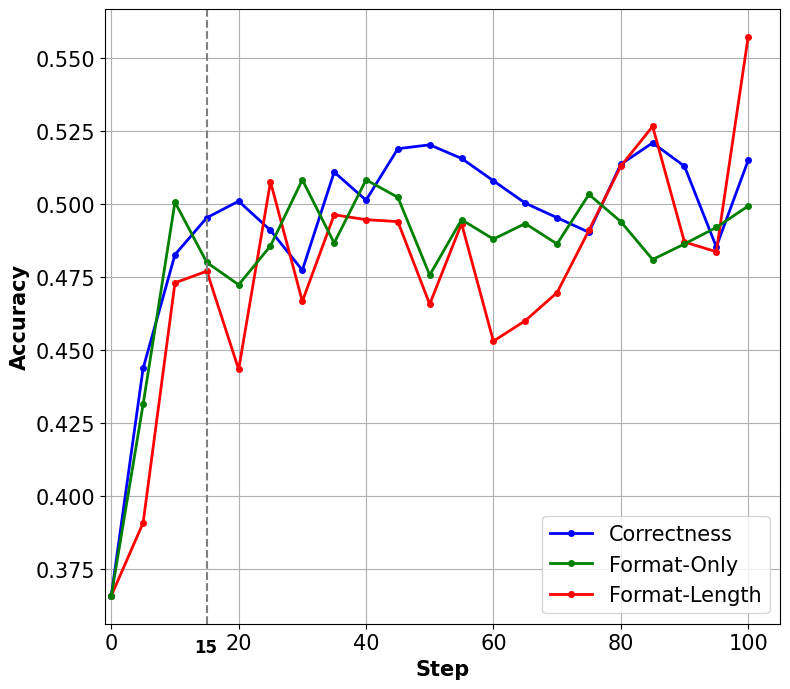

In [230]:
import matplotlib.pyplot as plt
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch
from matplotlib.transforms import Affine2D
import matplotlib.font_manager as fm



left_bound = 0
right_bound = 100

steps_baseline, acc_baseline = compute_accuracy_avg(baseline_data, left_bound, right_bound)
steps_exp1, acc_exp1 = compute_accuracy_avg(exp1_data, left_bound, right_bound)
steps_exp2, acc_exp2 = compute_accuracy_avg(exp2_data, left_bound, right_bound)

fig, ax = plt.subplots(figsize=(8, 7))

# 绘制折线图（3条曲线）
# ax.figure(figsize=(10, 6))
ax.plot(steps_baseline, acc_baseline, marker='o', markersize=4, linestyle='-', color='b', linewidth=2, label="Correctness")
ax.plot(steps_exp1, acc_exp1, marker='o', markersize=4, linestyle='-', color='r', linewidth=2, label="Format-Length")
ax.plot(steps_exp2, acc_exp2, marker='o', markersize=4, linestyle='-', color='g', linewidth=2, label="Format-Only")

# 添加竖线
ax.axvline(x=15, color='gray', linestyle='--', linewidth=1.5)


# 添加横线
# ax.axhline(y=0.67, color='black', linestyle='--', linewidth=1)

# 添加横线
# ax.axhline(y=0.74, color='black', linestyle='--', linewidth=1)

# 添加横线
# ax.axhline(y=0.366, color='b', linestyle='--', linewidth=1, label='Qwen-Math-7B-pass@1')      # 36.6%

# ax.axhline(y=0.834, color='deeppink', linestyle='--', linewidth=1, label='Qwen-Math-7B-pass@64')  # 83.4%

# ax.axhline(y=0.528, color='#17becf', linestyle='--', linewidth=1, label='LIMR-7B')               # 52.8%

# ax.axhline(y=0.533, color='#2ca02c', linestyle='--', linewidth=1, label='SimpleRL-Zero-7B')       # 53.3%

# ax.axhline(y=0.600, color='#1f77b4', linestyle='--', linewidth=1, label='Oat-Zero-7B')             # 60.0%

# ax.axhline(y=0.518, color='purple', linestyle='--', linewidth=1, label='Qwen2.5-Math-7B-Instruct')

# 添加注释
ax.text(13, 0.345, "15", rotation=0, color='black', fontsize=12, verticalalignment='bottom',fontweight='bold')



# 添加虚化效果
# ax.axvspan(xmin=15, xmax=130, ymin=0, ymax=1, color='gray', alpha=0.25)


ax.set_xlabel("Step", fontsize=15, fontweight='bold')
ax.set_ylabel("Accuracy", fontsize=15, fontweight='bold')
# ax.set_title("average accuracy during training", fontsize=15)

# ax.legend(loc='lower right', fontsize=10)

# 获取所有 legend 句柄和标签
handles, labels = ax.get_legend_handles_labels()

# 创建一个映射用于排序
order = {
    "Qwen-Math-7B-pass@64": 0,
    # "Qwen-Math-7B-pass@1": 1,
    "Oat-Zero-7B": 2, 
    "SimpleRL-Zero-7B": 3, #
    "LIMR-7B": 4,
    "Qwen2.5-Math-7B-Instruct":4.5,
    "Correctness": 5,
    "Format-Only": 6,
    "Format-Length": 7,
    "Format-Only(SOTA)": 8,
    "Qwen-Math-7B-pass@1": 9,
}

# 根据顺序排序
sorted_items = sorted(zip(handles, labels), key=lambda x: order.get(x[1], 999))
sorted_handles, sorted_labels = zip(*sorted_items)

# 设置 legend，顺序为排序后的顺序
ax.legend(sorted_handles, sorted_labels, loc='lower right', fontsize=15)


ax.grid(True)

ax.set_xlim(left=-1)
ax.set_xlim(right=right_bound+5)

# ax.set_ylim(bottom=0.2)

ax.tick_params(labelsize=15)

plt.tight_layout()  # 自动调整布局

fig_path = '../data/fig/avg_acc_all_100step_2.png'

plt.savefig(fig_path)


plt.show()



In [93]:
mid=30
end=100

print('mid step score:{}, end step score:{}, 提升幅度: {}'.format(acc_exp1[int(mid/5)], acc_exp1[int(end/5)], (acc_exp1[int(end/5)]-acc_exp1[int(mid/5)])/acc_exp1[int(mid/5)] ))



mid step score:0.4666666666666666, end step score:0.5573333333333333, 提升幅度: 0.19428571428571445


In [38]:
acc_baseline

def find_max_and_index(lst):
    if not lst:
        return None, None  # 如果列表为空，返回 None
    max_value = max(lst)
    max_index = lst.index(max_value)
    return max_value, max_index, max_index*5

print(find_max_and_index(acc_baseline))

print(find_max_and_index(acc_exp1))
print(find_max_and_index(acc_exp2))

# math 数据集的实验结果
# (0.521, 17)
# (0.5573333333333333, 20)
# (0.5083333333333333, 6)


(0.521, 17, 85)
(0.5573333333333333, 20, 100)
(0.5083333333333333, 6, 30)


#### 50step

In [231]:
from json_utils import *
import re
from collections import defaultdict
import matplotlib.pyplot as plt

baseline_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f/summary.json'

exp1_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_f_l_v3_token5_a-v3/summary.json'

exp3_path = '../data/logs/grpo-deepscaler_17k-7b_math-bs_128-3k-zs_qwen-r_a_g_f_l/summary.json'

baseline_data = load_json(baseline_path)

exp1_data = load_json(exp1_path)

exp3_data = load_json(exp3_path)

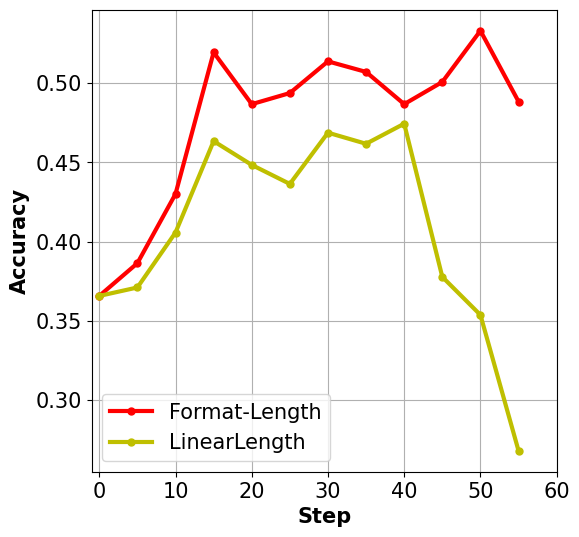

In [232]:
import matplotlib.pyplot as plt
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch
from matplotlib.transforms import Affine2D
import matplotlib.font_manager as fm


left_bound = 0
right_bound = 55

# steps_baseline, acc_baseline = compute_accuracy_avg(baseline_data, left_bound, right_bound)
steps_exp1, acc_exp1 = compute_accuracy_avg(exp1_data, left_bound, right_bound)
steps_exp3, acc_exp3 = compute_accuracy_avg(exp3_data, left_bound, right_bound)

fig, ax = plt.subplots(figsize=(6, 6))

# 绘制折线图（3条曲线）

# ax.plot(steps_baseline, acc_baseline, marker='o', markersize=4, linestyle='-', color='b', label="Correctness")
ax.plot(steps_exp1, acc_exp1, marker='o', markersize=5, linestyle='-', color='r', linewidth=3,label="Format-Length")
ax.plot(steps_exp3, acc_exp3, marker='o', markersize=5, linestyle='-', color='y', linewidth=3,label="LinearLength")


# 添加虚化效果
# ax.axvspan(xmin=15, xmax=130, ymin=0, ymax=1, color='gray', alpha=0.25)


ax.set_xlabel("Step", fontsize=15, fontweight='bold')
ax.set_ylabel("Accuracy", fontsize=15, fontweight='bold')
# ax.set_title("average accuracy during training", fontsize=16)

ax.legend(fontsize=15)
ax.grid(True)

ax.set_xlim(left=-1)
ax.set_xlim(right=60)

ax.tick_params(labelsize=15)

fig_path = '../data/fig/avg_acc_all_50step.png'


plt.savefig(fig_path, bbox_inches="tight")


plt.show()

